## Libraries

In [74]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
USING_COLAB = False

In [4]:
root_path = "/content/" if USING_COLAB else './data/'

X_train = pd.read_csv(root_path+'X_train_NHkHMNU.csv')
Y_train = pd.read_csv(root_path+'y_train_ZAN5mwg.csv')
X_test = pd.read_csv(root_path+'X_test_final.csv')

In [5]:
X_test.head(5)

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0  1115     241      FR        0.340083       -0.433604       -0.423521   
1  1202    1214      FR        0.803209        0.780411        0.601610   
2  1194    1047      FR        0.795540        0.721954        1.179158   
3  1084    1139      FR        0.172555       -0.723427       -0.044539   
4  1135     842      FR        0.949714        0.420236        0.617391   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  FR_NET_IMPORT  \
0        0.423521       0.165333       0.519419      -0.165333      -0.519419   
1       -0.601610       0.342802       0.555367      -0.342802      -0.555367   
2       -1.179158       1.620928       0.666901      -1.620928      -0.666901   
3        0.044539            NaN      -0.205276            NaN       0.205276   
4       -0.617391       0.608561      -0.240856      -0.608561       0.240856   

     DE_GAS    FR_GAS   DE_COAL   FR_COAL  DE_HYDRO  FR_HYDRO  DE_NUCLEAR  \
0  1.524963  0.423845  2.137016  0.478424  0.776246 -0.371184    0.069696   
1  1.064102  1.807256  0.089534 -0.792111  1.549245  0.107882    0.826372   
2  0.128004 -0.043300 -0.829546 -0.785153  0.419503  0.014481    0.444562   
3  1.046069 -0.174150  0.888429 -0.283794  1.864139  0.114829    0.616779   
4  1.376753  1.413967  1.703635 -0.239676  0.815007  0.179202    0.702691   

   FR_NUCLEAR  DE_SOLAR  FR_SOLAR  DE_WINDPOW  FR_WINDPOW  DE_LIGNITE  \
0    0.057826  0.005100 -0.276211   -1.145765   -0.827504    0.778229   
1    0.746628  0.585133  1.034943   -0.211726   -0.698175    0.727622   
2    1.000065 -0.427068 -0.011782    2.373643    1.248551   -1.440563   
3   -0.779813  0.727103  1.018475   -1.146251   -0.999996    0.792428   
4    0.169555 -0.873472 -0.538052   -0.274033   -0.215250    0.923490   

   DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND  \
0          1.246268         -0.222525 -0.513180 -0.182048 -0.982546 -0.876632   
1          0.553214          0.857739 -0.340595 -0.301094 -0.759816 -1.221443   
2         -1.398675          0.447967  0.796475 -0.367248  0.376055 -0.483363   
3          0.905864         -0.561295 -0.542606 -0.013291 -0.791119 -0.894309   
4          1.167985          0.503567 -0.230291 -0.609203 -0.744986 -1.196282   

    DE_TEMP   FR_TEMP   GAS_RET  COAL_RET  CARBON_RET  
0  0.880491  0.692242  0.569419 -0.029697   -0.929256  
1 -0.616617 -0.737496  0.251251  0.753646    0.664086  
2  0.865138  0.120079 -1.485642 -0.326450   -0.349747  
3  0.239153  0.457457 -0.746863  2.262654    0.642069  
4  0.176557  0.312557 -2.219626 -0.509272   -0.488341

In [6]:
Y_train.head()

ID    TARGET
0  1054  0.028313
1  2049 -0.112516
2  1924 -0.180840
3   297 -0.260356
4  1101 -0.071733

# EDA

Number of rows and columns

In [7]:
print(f'The train set has {len(X_train)} rows', f'and {len(X_train.columns)} columns')
print(f'The test set has {len(X_test)} rows', f'and {len(X_test.columns)} columns')

The train set has 1494 rows and 35 columns
The test set has 654 rows and 35 columns


Data type check

In [8]:
print(X_train.dtypes)

ID                    int64
DAY_ID                int64
COUNTRY              object
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
dtype: object


Checking for duplicate values

In [9]:
print(X_train.duplicated().sum())
print(Y_train.duplicated().sum())

0
0


Checking null values

In [10]:
X_train.isna().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
dtype: int64

To better understand - We can plot each feature and highlight the missing ones.

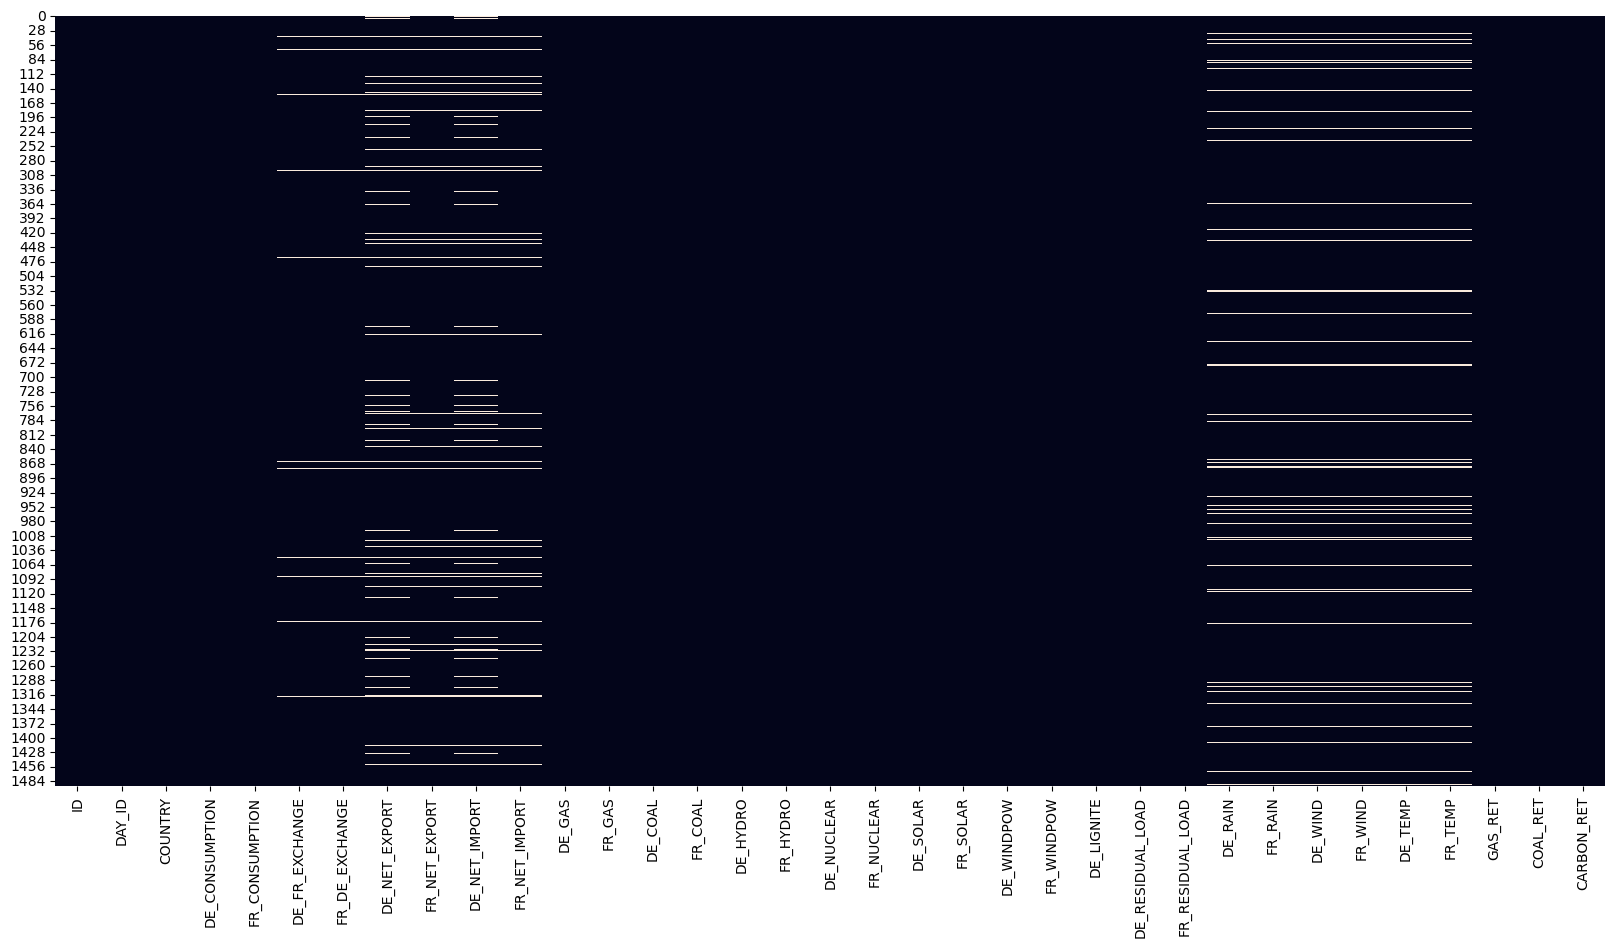

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.isna(), cbar = False);

In [12]:
X_train.dropna(subset=['DE_NET_EXPORT']).isna().sum()

ID                   0
DAY_ID               0
COUNTRY              0
DE_CONSUMPTION       0
FR_CONSUMPTION       0
DE_FR_EXCHANGE       0
FR_DE_EXCHANGE       0
DE_NET_EXPORT        0
FR_NET_EXPORT        0
DE_NET_IMPORT        0
FR_NET_IMPORT        0
DE_GAS               0
FR_GAS               0
DE_COAL              0
FR_COAL              0
DE_HYDRO             0
FR_HYDRO             0
DE_NUCLEAR           0
FR_NUCLEAR           0
DE_SOLAR             0
FR_SOLAR             0
DE_WINDPOW           0
FR_WINDPOW           0
DE_LIGNITE           0
DE_RESIDUAL_LOAD     0
FR_RESIDUAL_LOAD     0
DE_RAIN             94
FR_RAIN             94
DE_WIND             94
FR_WIND             94
DE_TEMP             94
FR_TEMP             94
GAS_RET              0
COAL_RET             0
CARBON_RET           0
dtype: int64

In [13]:
X_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [ ]:
X_train_cp = X_train.copy()

In [78]:
int_columns = X_train_cp.select_dtypes(include='float').columns
for col in int_columns:
    X_train_cp.fillna({ col: X_train_cp[col].median()}, inplace=True)

X_train_cp['COUNTRY'] = LabelEncoder().fit(X_train_cp['COUNTRY']).transform(X_train_cp['COUNTRY'])

In [79]:
X_train_cp.isna().sum()

ID                  0
DAY_ID              0
COUNTRY             0
DE_CONSUMPTION      0
FR_CONSUMPTION      0
DE_FR_EXCHANGE      0
FR_DE_EXCHANGE      0
DE_NET_EXPORT       0
FR_NET_EXPORT       0
DE_NET_IMPORT       0
FR_NET_IMPORT       0
DE_GAS              0
FR_GAS              0
DE_COAL             0
FR_COAL             0
DE_HYDRO            0
FR_HYDRO            0
DE_NUCLEAR          0
FR_NUCLEAR          0
DE_SOLAR            0
FR_SOLAR            0
DE_WINDPOW          0
FR_WINDPOW          0
DE_LIGNITE          0
DE_RESIDUAL_LOAD    0
FR_RESIDUAL_LOAD    0
DE_RAIN             0
FR_RAIN             0
DE_WIND             0
FR_WIND             0
DE_TEMP             0
FR_TEMP             0
GAS_RET             0
COAL_RET            0
CARBON_RET          0
dtype: int64

In [80]:
X_train_cp.describe()

ID       DAY_ID      COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  \
count  1494.000000  1494.000000  1494.000000     1494.000000     1494.000000   
mean   1072.759036   591.861446     0.569612        0.427442       -0.020032   
std     618.013179   345.065043     0.495296        0.673412        0.918995   
min       0.000000     0.000000     0.000000       -2.265563       -1.462350   
25%     540.250000   292.250000     0.000000       -0.037421       -0.716771   
50%    1077.500000   591.000000     1.000000        0.357061       -0.394166   
75%    1597.500000   885.750000     1.000000        0.922057        0.650533   
max    2146.000000  1215.000000     1.000000        2.033851        3.300640   

       DE_FR_EXCHANGE  FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  \
count     1494.000000     1494.000000    1494.000000    1494.000000   
mean        -0.145822        0.145822      -0.260529      -0.064580   
std          0.962071        0.962071       0.916927       1.050937   
min         -2.856874       -2.634831      -2.464849      -2.825331   
25%         -0.869990       -0.631683      -0.921263      -0.820640   
50%         -0.164287        0.164287      -0.306899       0.099455   
75%          0.631683        0.869990       0.395910       0.774676   
max          2.634831        2.856874       2.279619       1.951516   

       DE_NET_IMPORT  FR_NET_IMPORT       DE_GAS       FR_GAS      DE_COAL  \
count    1494.000000    1494.000000  1494.000000  1494.000000  1494.000000   
mean        0.260529       0.064580     0.780699     0.395019    -0.134330   
std         0.916927       1.050937     0.850190     0.906500     0.847285   
min        -2.279619      -1.951516    -1.117260    -1.317350    -1.491593   
25%        -0.395910      -0.774676     0.134947    -0.205078    -0.833046   
50%         0.306899      -0.099455     0.740006     0.256780    -0.246732   
75%         0.921263       0.820640     1.399461     1.090646     0.485761   
max         2.464849       2.825331     3.118082     2.372570     2.324889   

           FR_COAL     DE_HYDRO     FR_HYDRO   DE_NUCLEAR   FR_NUCLEAR  \
count  1494.000000  1494.000000  1494.000000  1494.000000  1494.000000   
mean     -0.434518     0.537398     0.105639    -0.468190    -0.446805   
std       0.506141     1.086330     1.057867     0.902468     0.964543   
min      -0.794950    -1.373985    -1.758523    -2.689387    -2.595326   
25%      -0.779098    -0.314520    -0.693892    -0.954908    -1.228912   
50%      -0.766389     0.330832    -0.138049    -0.097032    -0.327874   
75%      -0.262886     1.282374     0.776483     0.100720     0.143426   
max       1.905512     4.181936     3.730478     0.893087     1.854408   

          DE_SOLAR     FR_SOLAR   DE_WINDPOW   FR_WINDPOW   DE_LIGNITE  \
count  1494.000000  1494.000000  1494.000000  1494.000000  1494.000000   
mean      0.246707     0.608185     0.146337     0.398426    -0.298856   
std       1.069899     1.079398     1.064187     1.189404     0.851339   
min      -1.442296    -1.312588    -1.235802    -1.143277    -2.879041   
25%      -0.731345    -0.311343    -0.688284    -0.527749    -0.787239   
50%       0.211219     0.566797    -0.091336     0.007051    -0.188300   
75%       1.158397     1.368670     0.644247     1.010071     0.273510   
max       2.696571     3.648905     3.509017     4.965793     1.586885   

       DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD      DE_RAIN      FR_RAIN  \
count       1494.000000       1494.000000  1494.000000  1494.000000   
mean           0.071633         -0.153688    -0.052747     0.003785   
std            0.851499          0.896325     0.954484     1.019906   
min           -2.613569         -1.678936    -2.128531    -1.726420   
25%           -0.422896         -0.802333    -0.618791    -0.488625   
50%            0.151799         -0.460160    -0.274901    -0.228147   
75%            0.621209          0.382191     0.274779     0.125947   
max            2.539576          2.918326     7.75

In [81]:
X_train_cp.to_csv(root_path+'X_train_cleaned.csv', index=False)

In [57]:
X_test.isna().sum()

ID                   0
DAY_ID               0
COUNTRY              0
DE_CONSUMPTION       0
FR_CONSUMPTION       0
DE_FR_EXCHANGE       9
FR_DE_EXCHANGE       9
DE_NET_EXPORT       47
FR_NET_EXPORT       24
DE_NET_IMPORT       47
FR_NET_IMPORT       24
DE_GAS               0
FR_GAS               0
DE_COAL              0
FR_COAL              0
DE_HYDRO             0
FR_HYDRO             0
DE_NUCLEAR           0
FR_NUCLEAR           0
DE_SOLAR             0
FR_SOLAR             0
DE_WINDPOW           0
FR_WINDPOW           0
DE_LIGNITE           0
DE_RESIDUAL_LOAD     0
FR_RESIDUAL_LOAD     0
DE_RAIN             40
FR_RAIN             40
DE_WIND             40
FR_WIND             40
DE_TEMP             40
FR_TEMP             40
GAS_RET              0
COAL_RET             0
CARBON_RET           0
dtype: int64

In [ ]:
X_test_cp = X_test.copy()

In [82]:
int_columns = X_test_cp.select_dtypes(include='float').columns

for col in int_columns:
    X_test_cp.fillna({ col: X_train_cp[col].median()}, inplace=True)

X_test_cp['COUNTRY'] = LabelEncoder().fit(X_test_cp['COUNTRY']).transform(X_test_cp['COUNTRY'])

In [75]:
X_test_cp.to_csv(root_path+'X_test_cleaned.csv', index=False)

In [76]:
combined_train = pd.concat([X_train_cp, Y_train], axis=1)
combined_train.head()

ID  DAY_ID  COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
0  1054     206        1        0.210099       -0.427458       -0.606523   
1  2049     501        1       -0.022399       -1.003452       -0.022063   
2  1924     687        1        1.395035        1.978665        1.021305   
3   297     720        0       -0.983324       -0.849198       -0.839586   
4  1101     818        1        0.143807       -0.617038       -0.924990   

   FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  FR_NET_IMPORT  \
0        0.606523      -0.306899       0.692860       0.306899      -0.692860   
1        0.022063      -0.573520      -1.130838       0.573520       1.130838   
2       -1.021305      -0.622021      -1.682587       0.622021       1.682587   
3        0.839586      -0.270870       0.563230       0.270870      -0.563230   
4        0.924990      -0.306899       0.990324       0.306899      -0.990324   

     DE_GAS    FR_GAS   DE_COAL   FR_COAL  DE_HYDRO  FR_HYDRO  DE_NUCLEAR  \
0  0.441238 -0.213766  0.740627  0.288782  2.209047  0.207838    0.709614   
1  0.174773  0.426940 -0.170392 -0.762153  0.187964 -0.807112   -1.882740   
2  2.351913  2.122241  1.572267  0.777053 -0.108578  0.779142   -1.897109   
3  0.487818  0.194659 -1.473817 -0.786025 -0.368417  1.320483   -0.205547   
4  0.238693 -0.240862  1.003734 -0.274975 -0.230179 -0.795983   -0.005581   

   FR_NUCLEAR  DE_SOLAR  FR_SOLAR  DE_WINDPOW  FR_WINDPOW  DE_LIGNITE  \
0   -0.190463  0.101766  1.248911   -0.573370   -0.269460    0.870344   
1   -2.185961  1.987428  3.237380   -0.035514   -0.107350   -0.194308   
2    0.735137 -1.115583 -0.371039   -0.298755   -0.141239    0.428272   
3   -1.589554  1.751523  0.562944   -0.010090    0.366885   -2.330557   
4    0.176935  0.693543  0.723587   -0.774941   -0.564498    0.691040   

   DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD   DE_RAIN   FR_RAIN   DE_WIND   FR_WIND  \
0          0.626666         -0.444661 -0.172680 -0.556356 -0.790823 -0.283160   
1         -0.395469         -1.183194 -1.240300 -0.770457  1.522331  0.828412   
2          1.336625          1.947273 -0.480700 -0.313338  0.431134  0.487608   
3         -1.191889         -0.976974 -1.114838 -0.507570 -0.499409 -0.236249   
4          0.571613         -0.526267 -0.541465 -0.424550 -1.088158 -1.011560   

    DE_TEMP   FR_TEMP   GAS_RET  COAL_RET  CARBON_RET    ID    TARGET  
0 -1.069070 -0.063404  0.339041  0.124552   -0.002445  1054  0.028313  
1  0.437419  1.831241 -0.659091  0.047114   -0.490365  2049 -0.112516  
2  0.684884  0.114836  0.535974  0.743338    0.204952  1924 -0.180840  
3  0.350938 -0.417514  0.911652 -0.296168    1.073948   297 -0.260356  
4  0.614338  0.729495  0.245109  1.526606    2.614378  1101 -0.071733

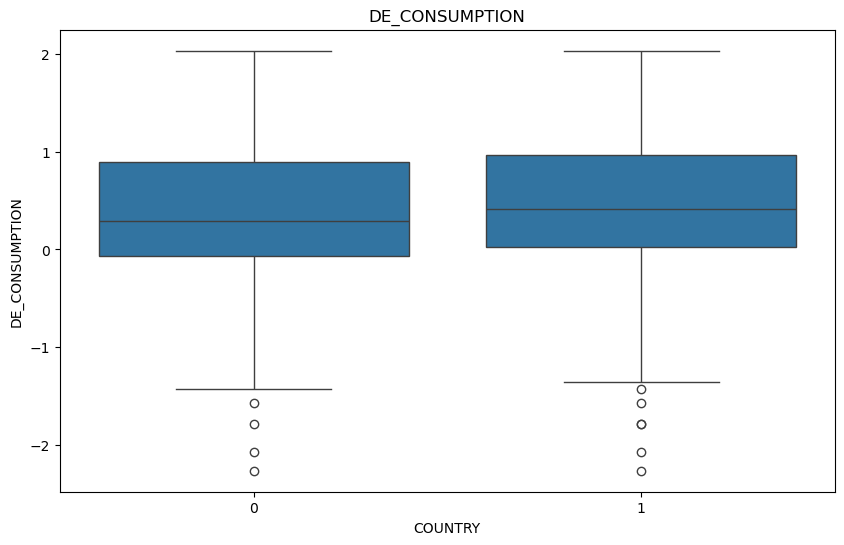

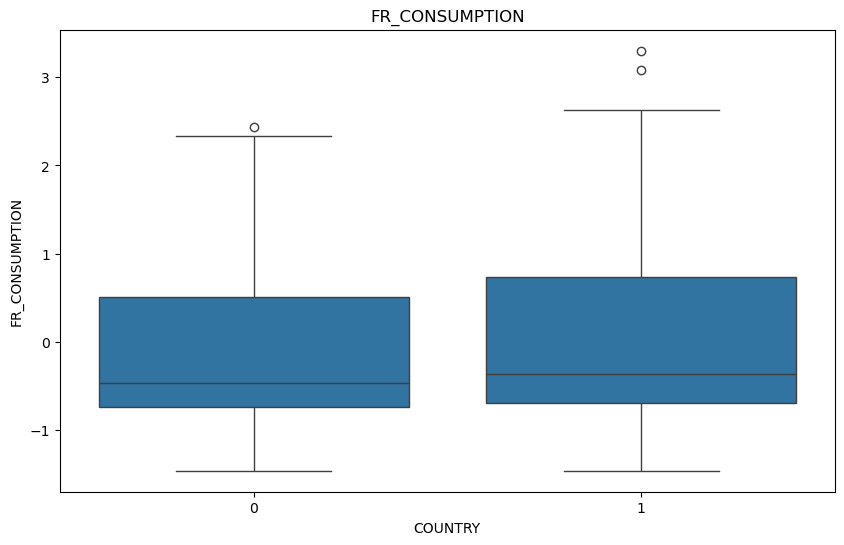

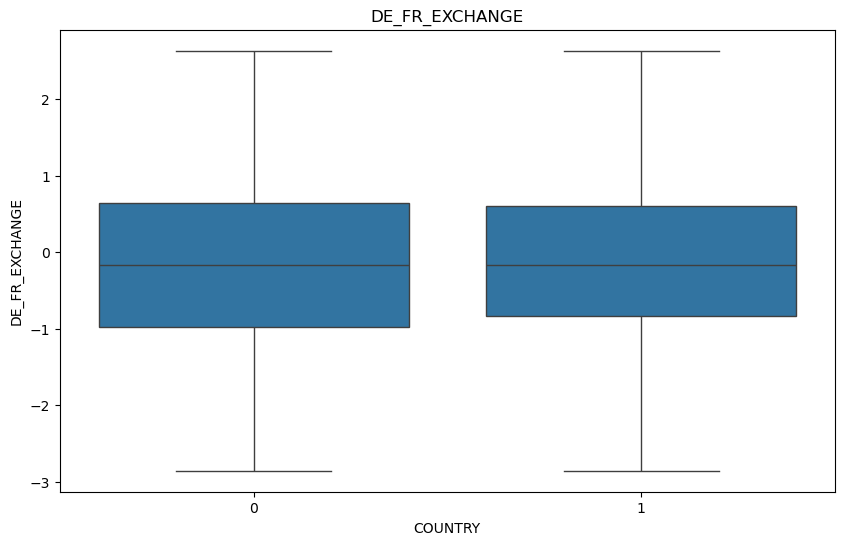

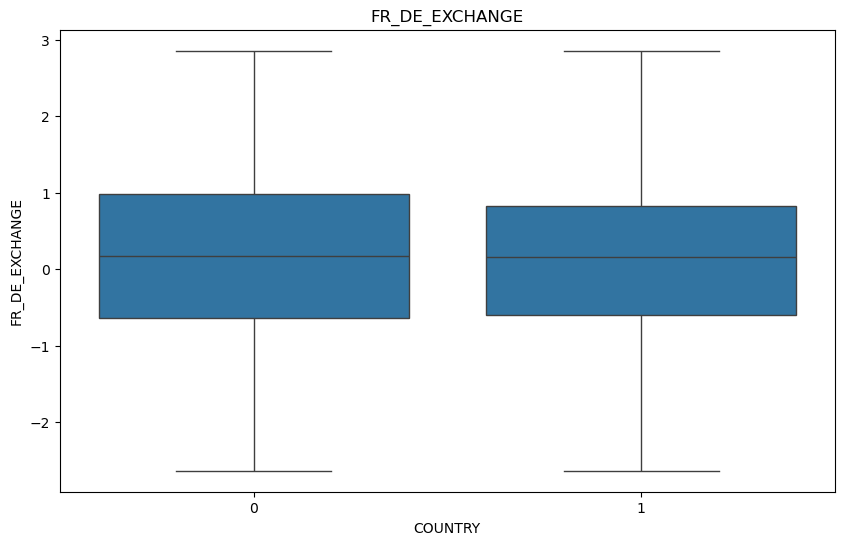

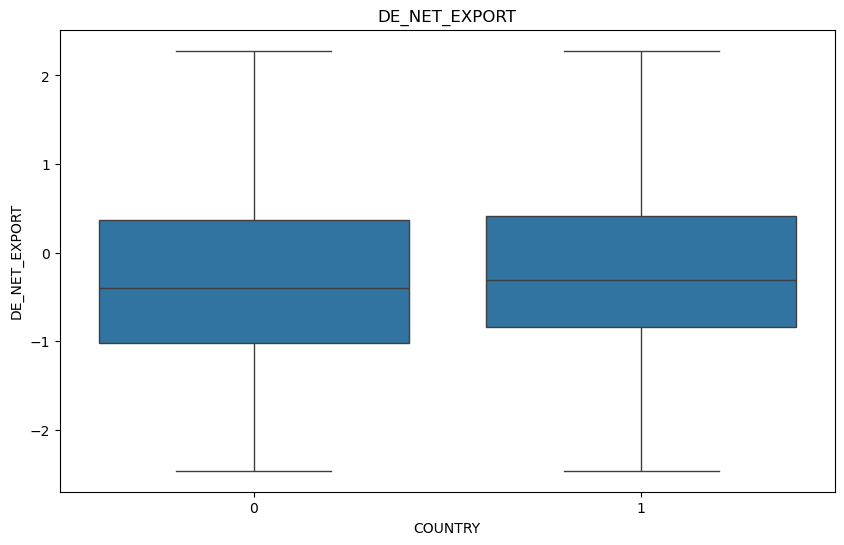

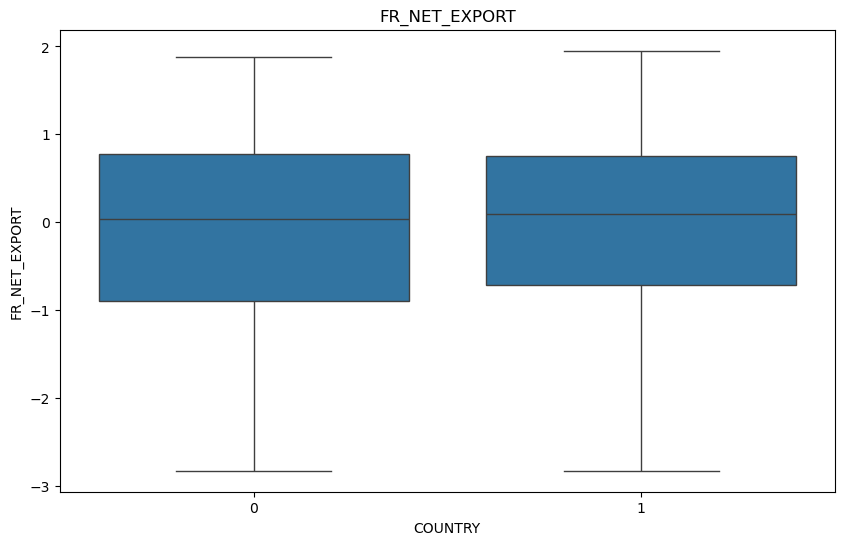

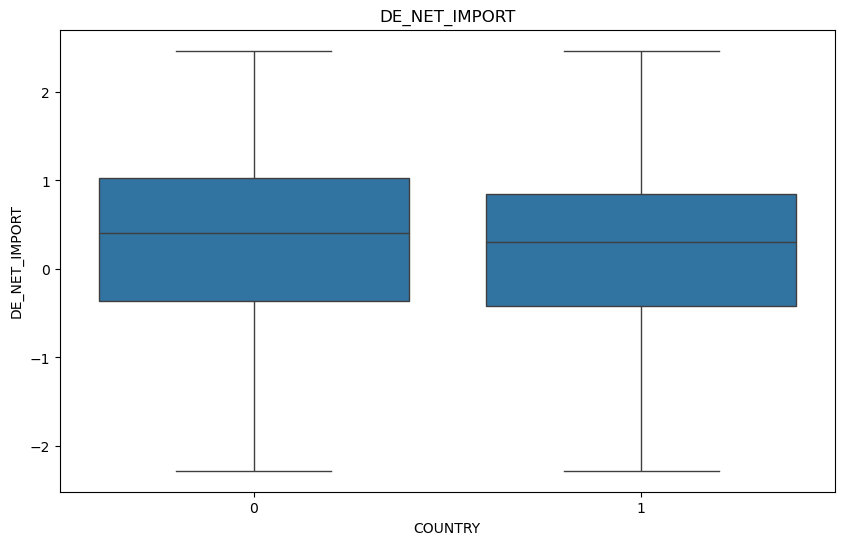

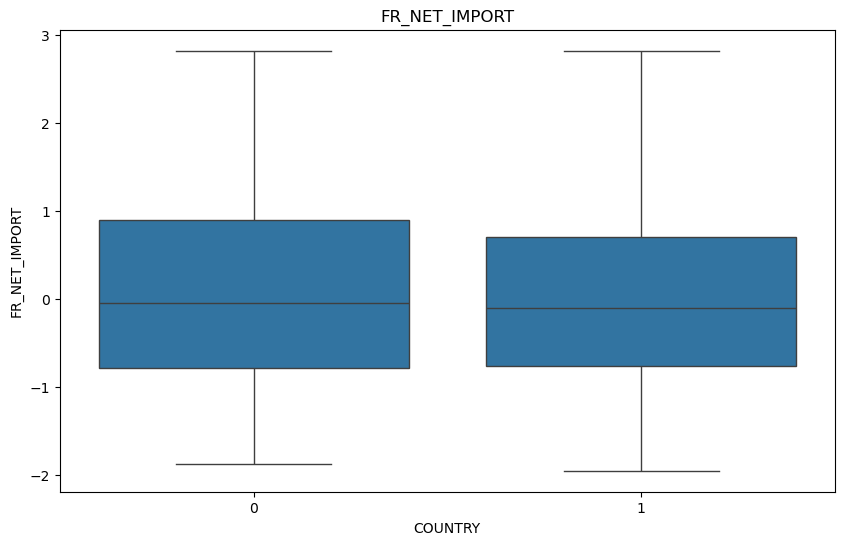

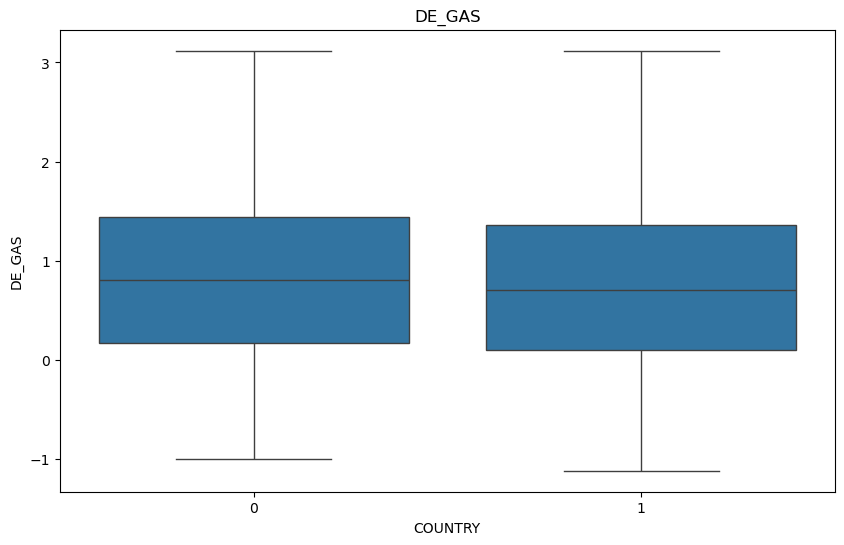

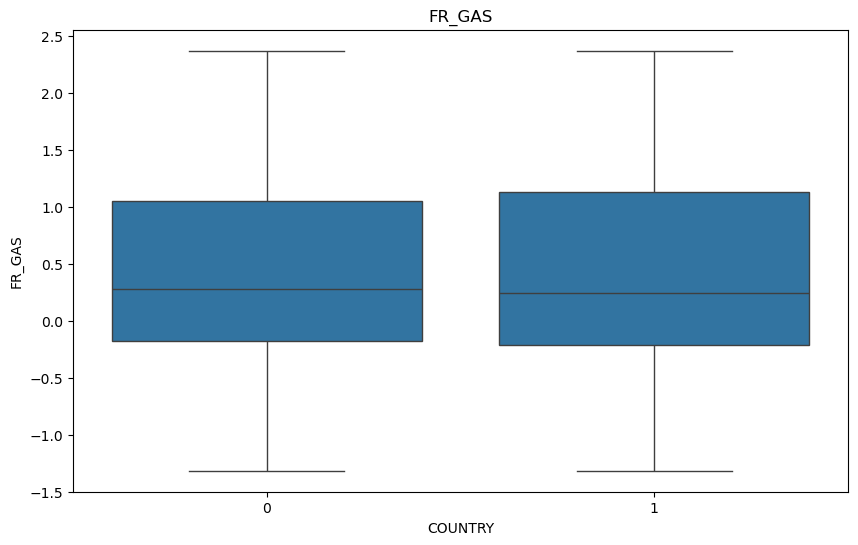

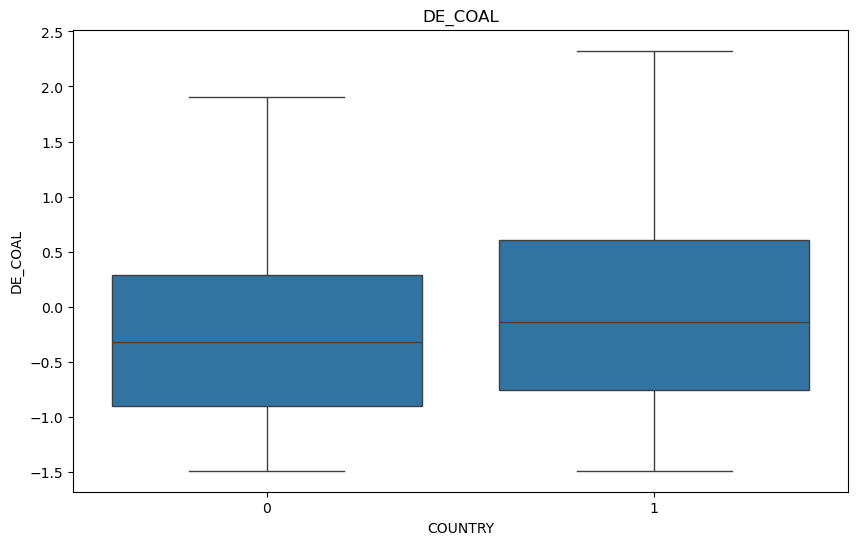

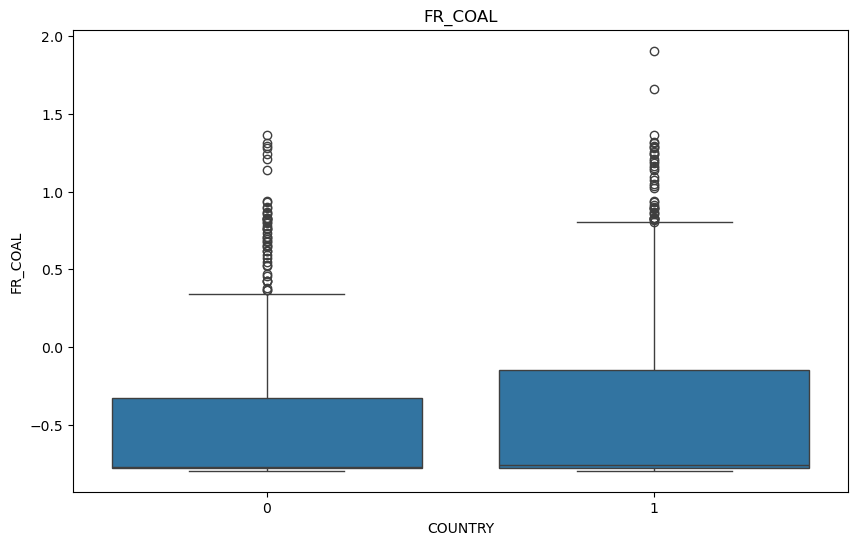

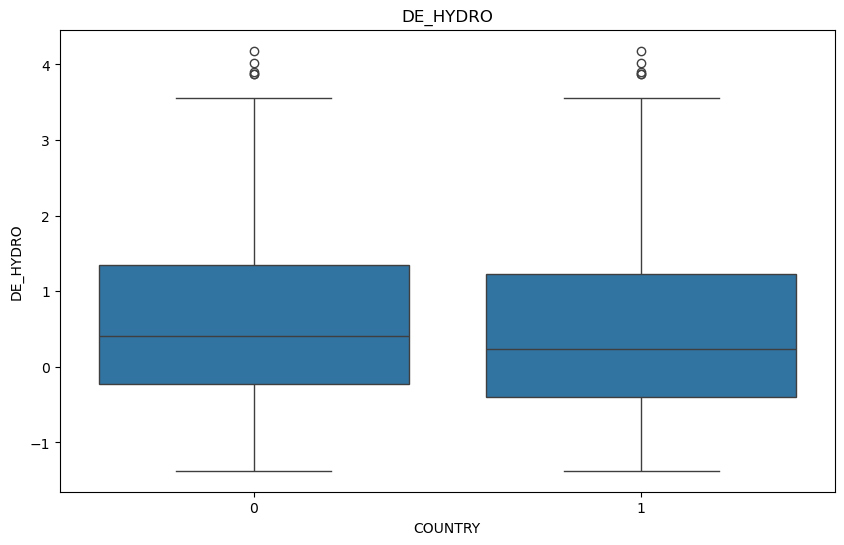

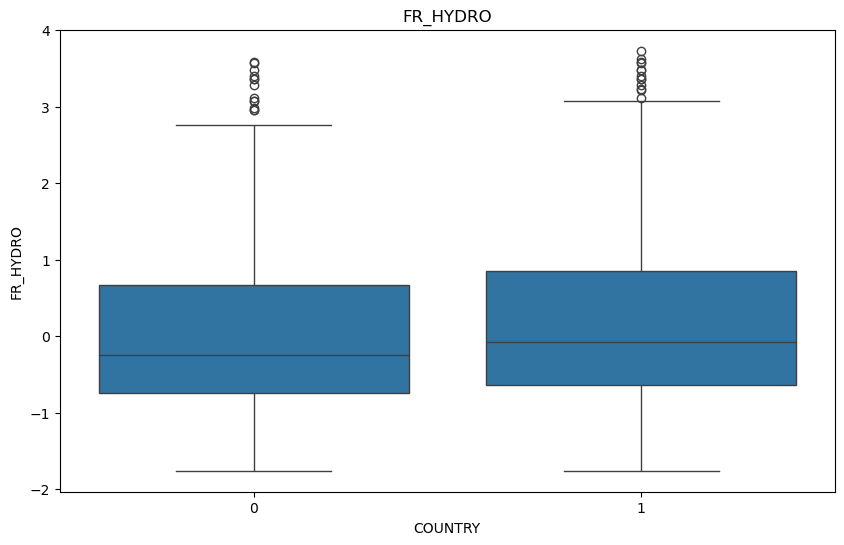

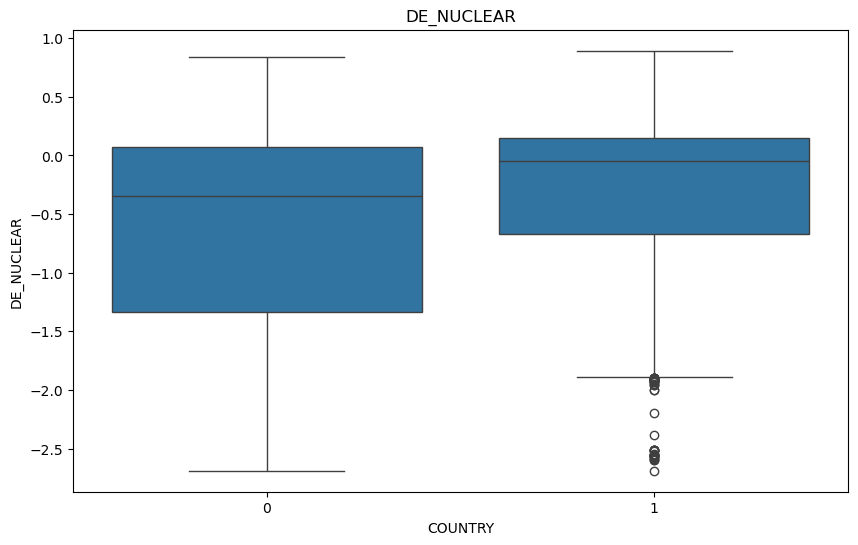

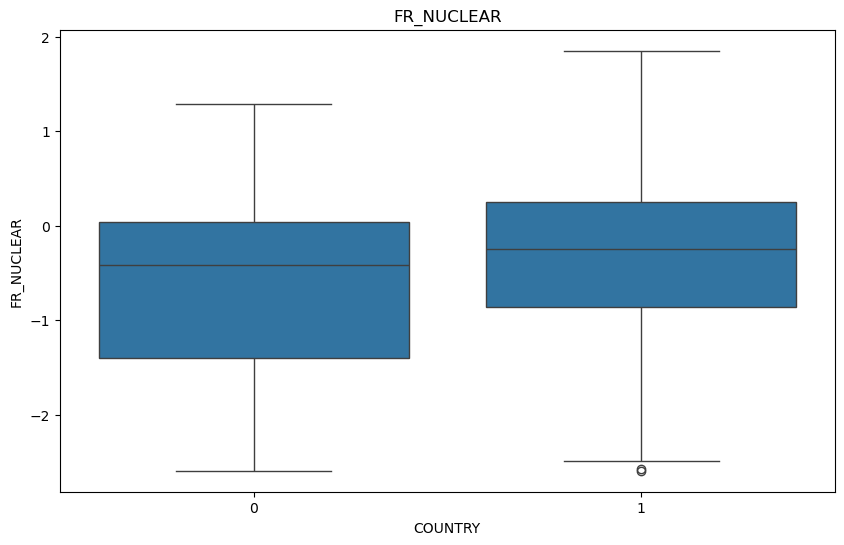

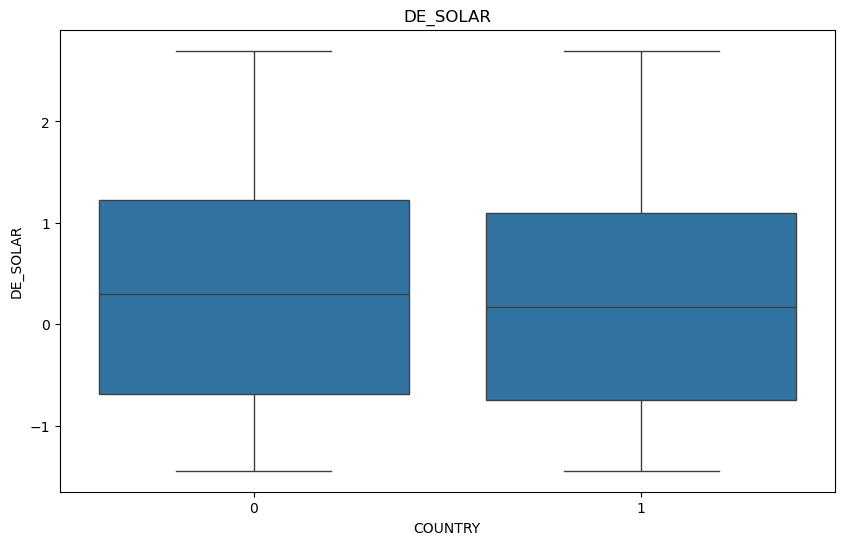

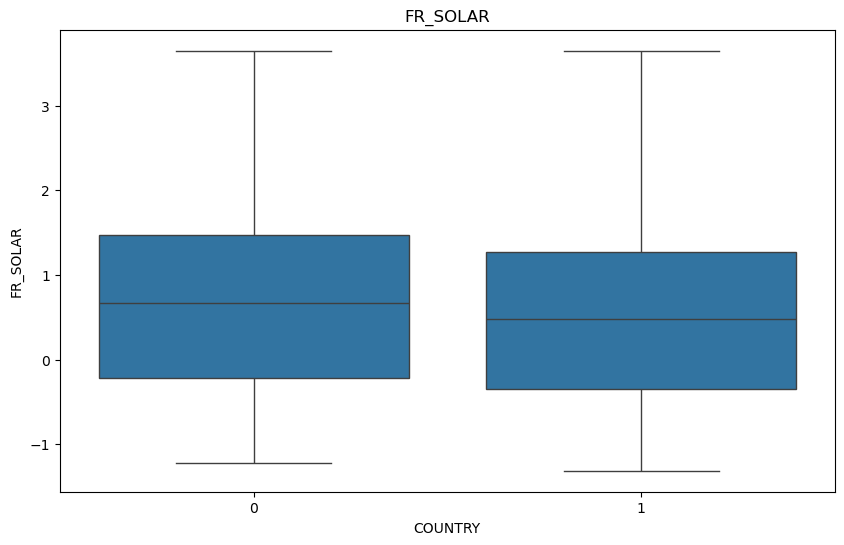

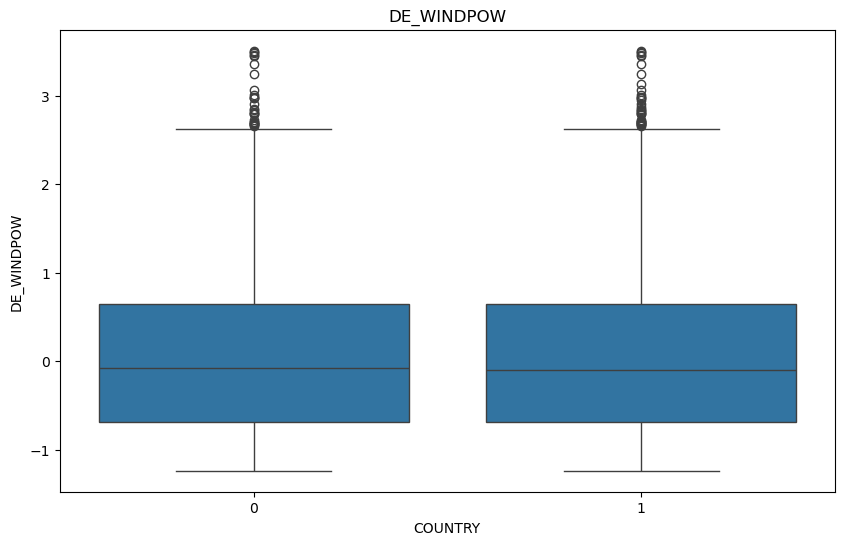

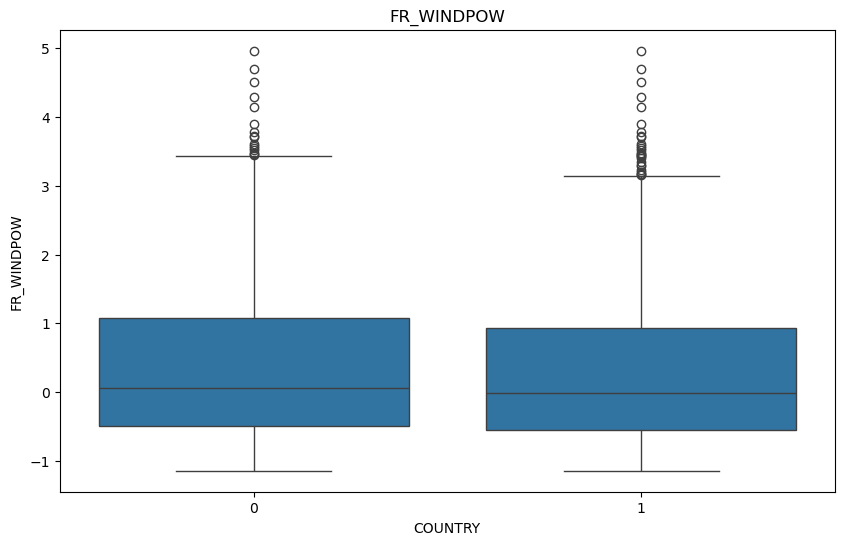

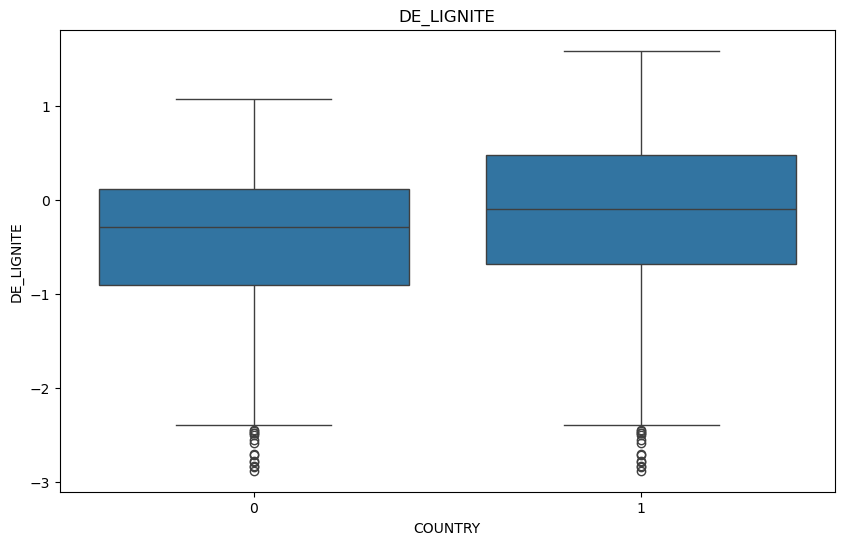

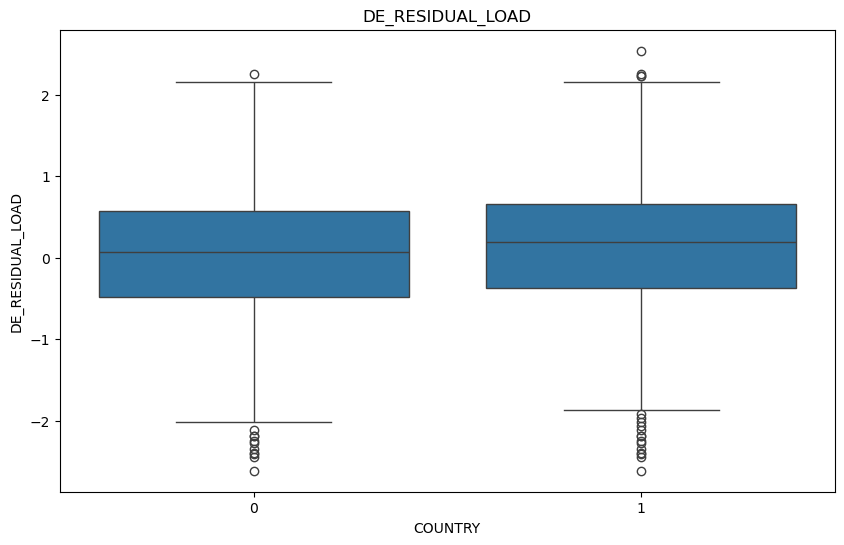

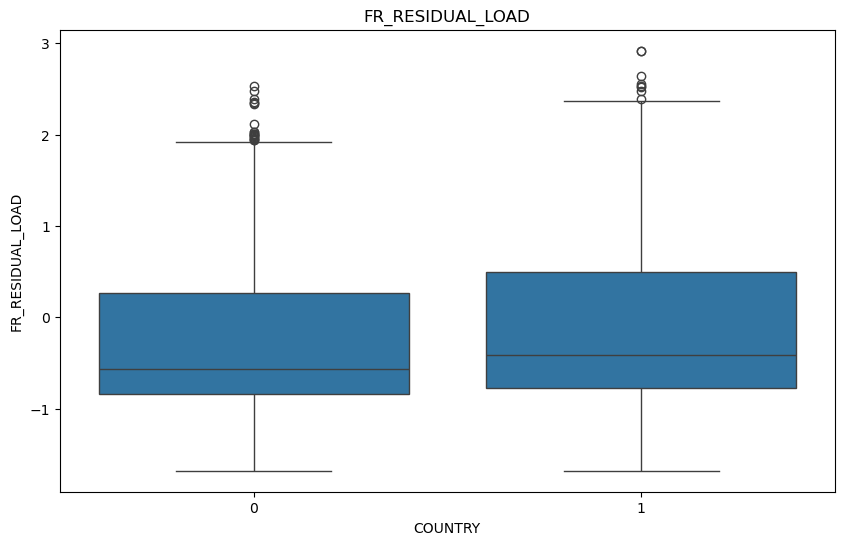

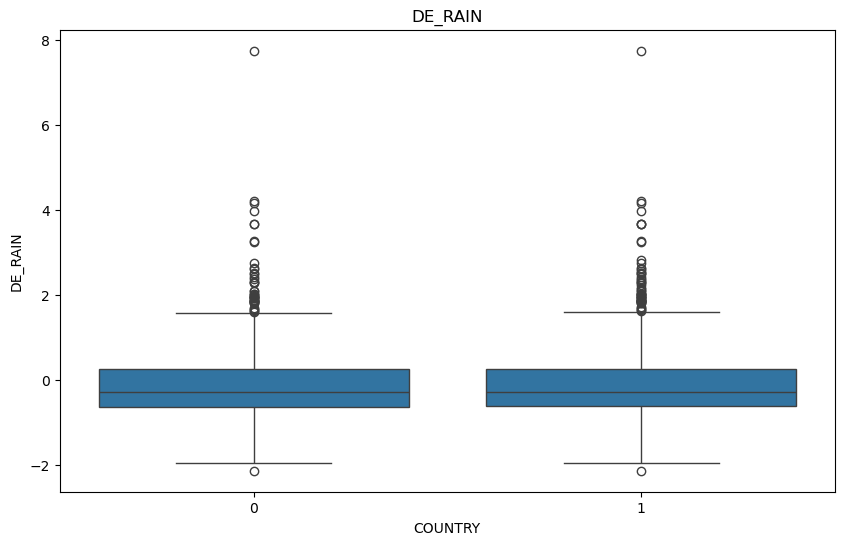

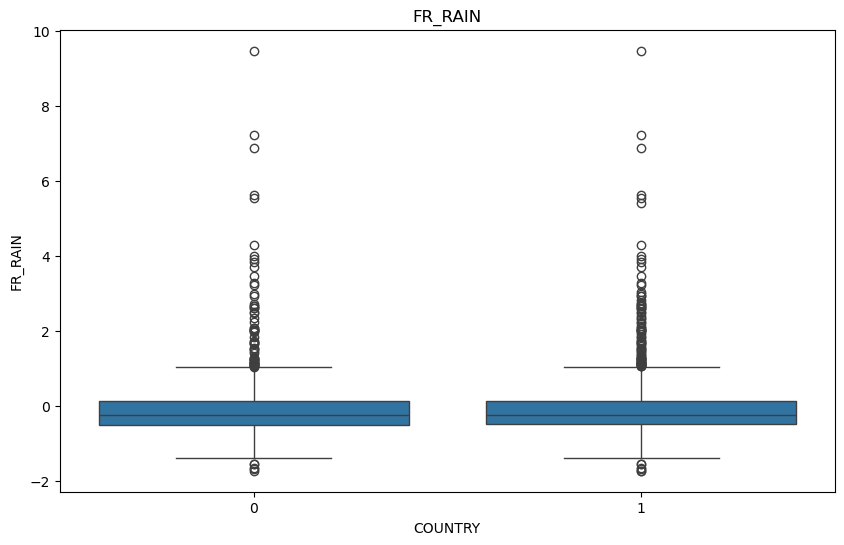

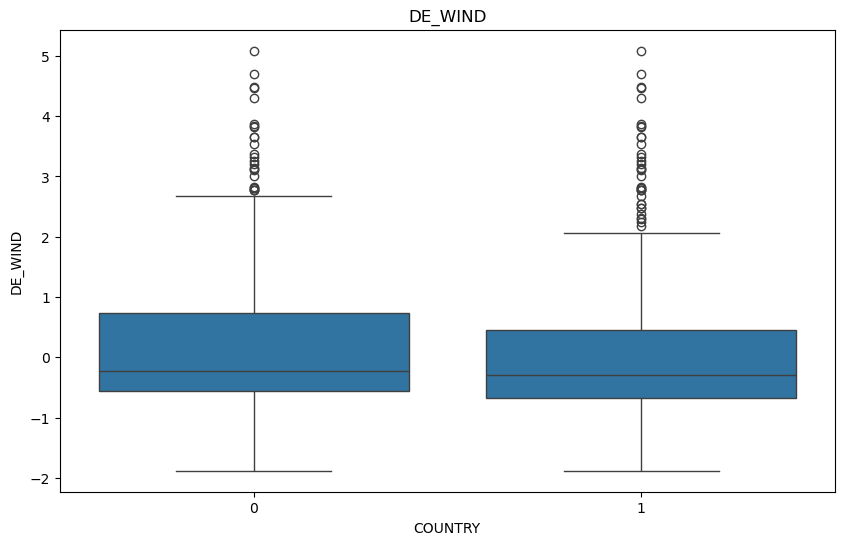

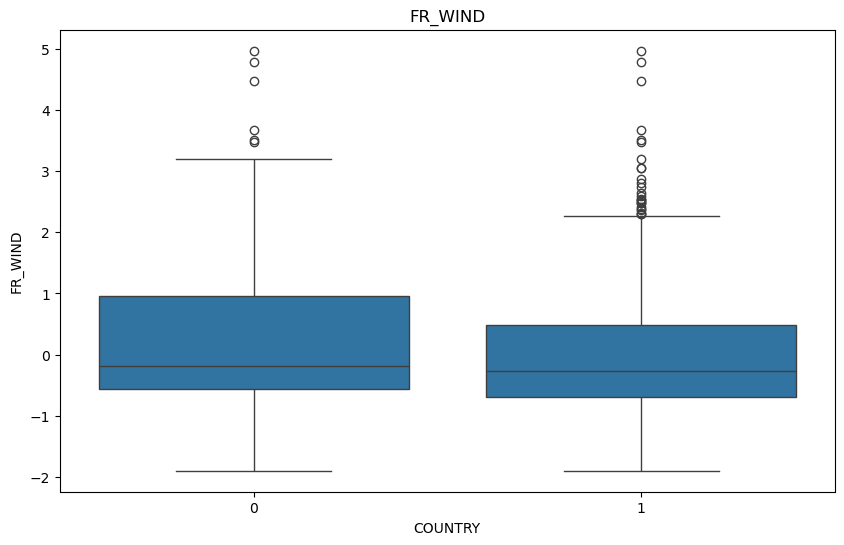

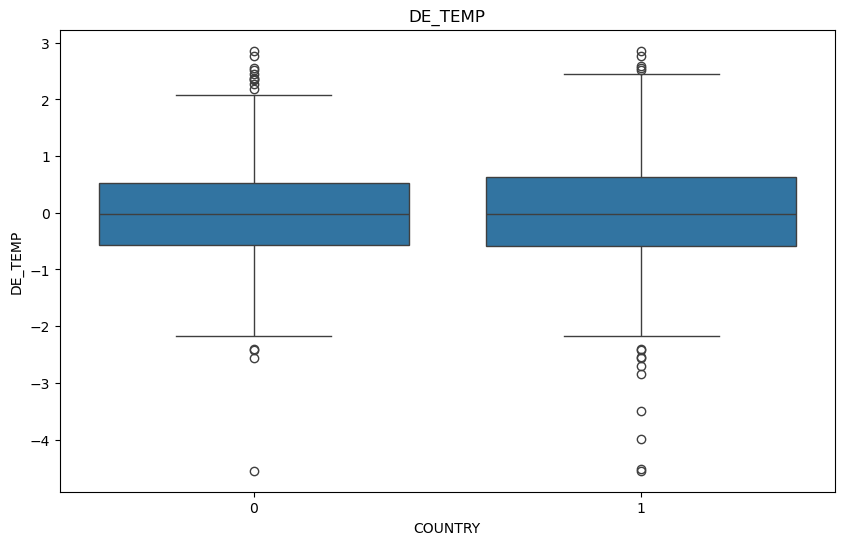

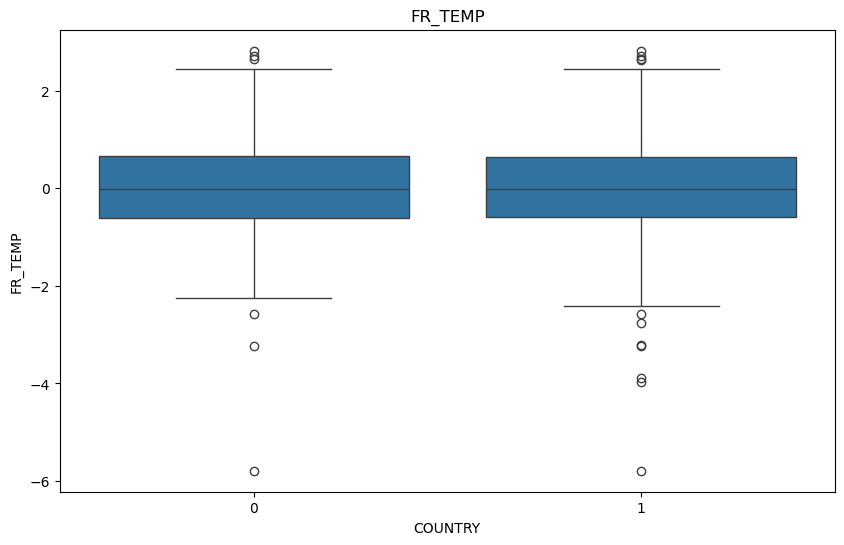

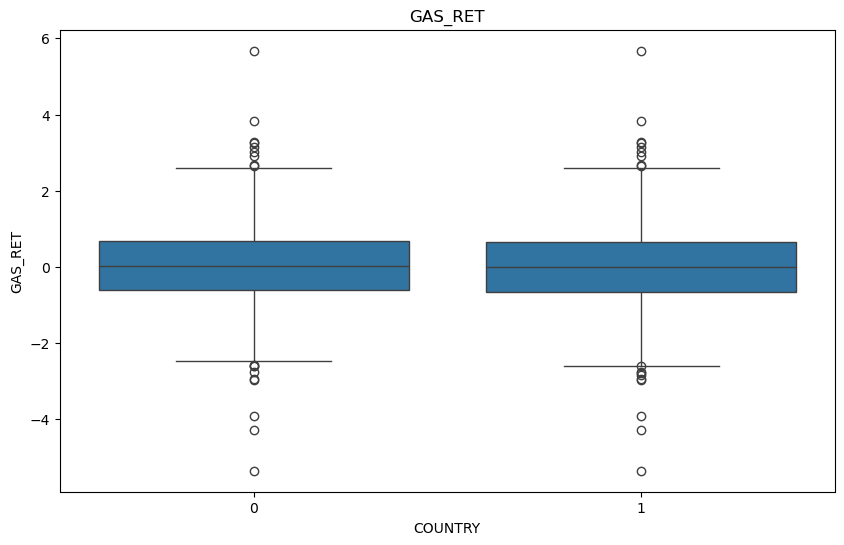

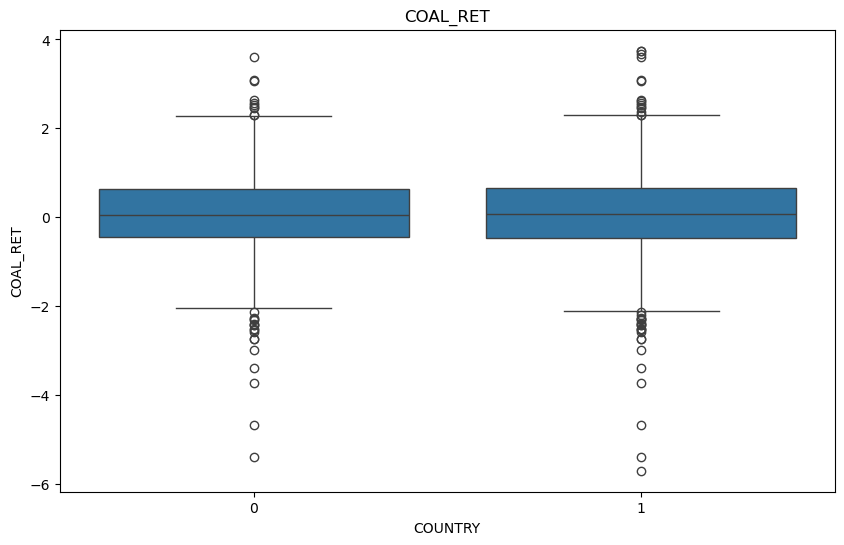

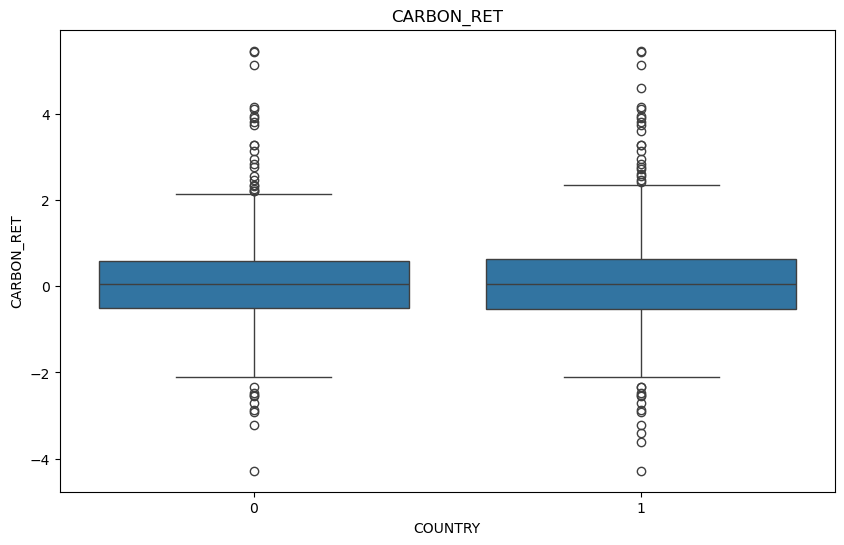

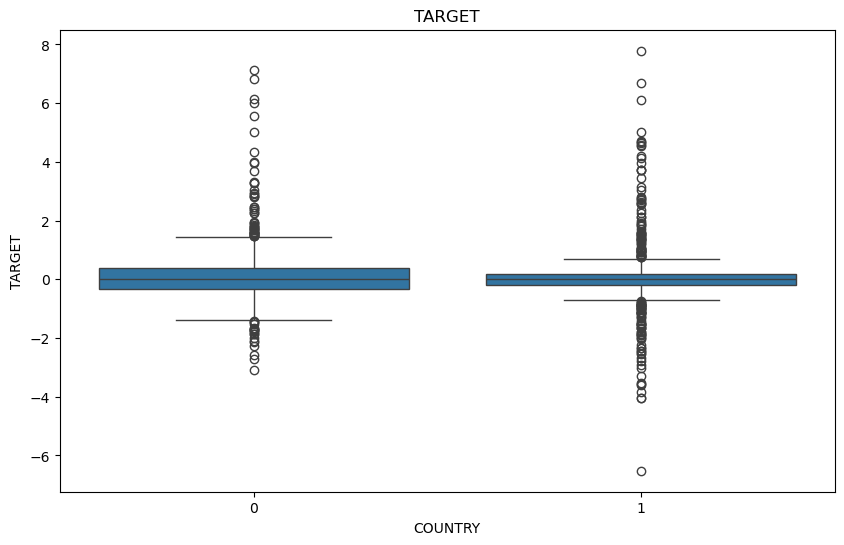

In [77]:
features = combined_train.columns
features = features.drop('ID')
features = features.drop('DAY_ID')
features = features.drop('COUNTRY')

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_train, x='COUNTRY', y=feature)
    plt.title(feature)
    plt.show()


## Histogram of continuous variables

We can plot the distribution of the continuous variables to get an idea of the future clustering.

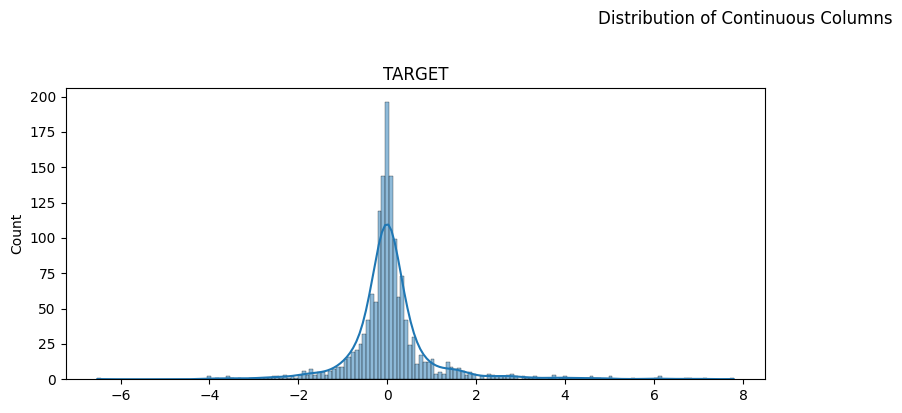

In [19]:
def plot_continous_distribution(data,subplots_per_row=3):

    continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns
    total_subplots = len(continuous_columns)

    total_rows = (total_subplots - 1) // subplots_per_row + 1

    fig, axes = plt.subplots(total_rows, subplots_per_row, figsize=(15, total_rows * 4))
    fig.suptitle('Distribution of Continuous Columns', y=1.02)

    axes = axes.flatten() 

    for i, column in enumerate(continuous_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')

    if total_subplots < len(axes):
        for j in range(total_subplots, len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

combined_train_filtered = combined_train[["TARGET"]]
plot_continous_distribution(combined_train_filtered, subplots_per_row=2)

<details>
<summary>Click to expand/collapse</summary>

```python
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=combined_train, x=feature, y='TARGET')
    plt.show()
```

</details>


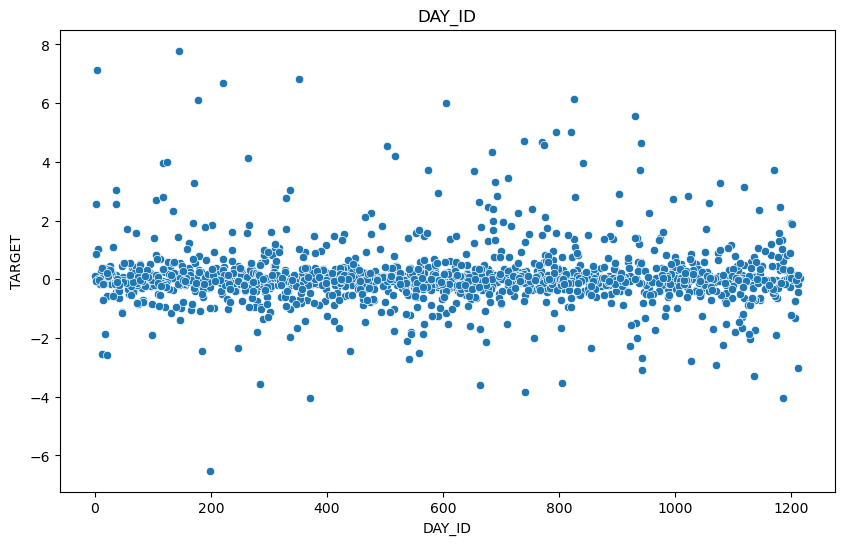

In [23]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_train, x='DAY_ID', y='TARGET')
plt.title('DAY_ID')
plt.show()

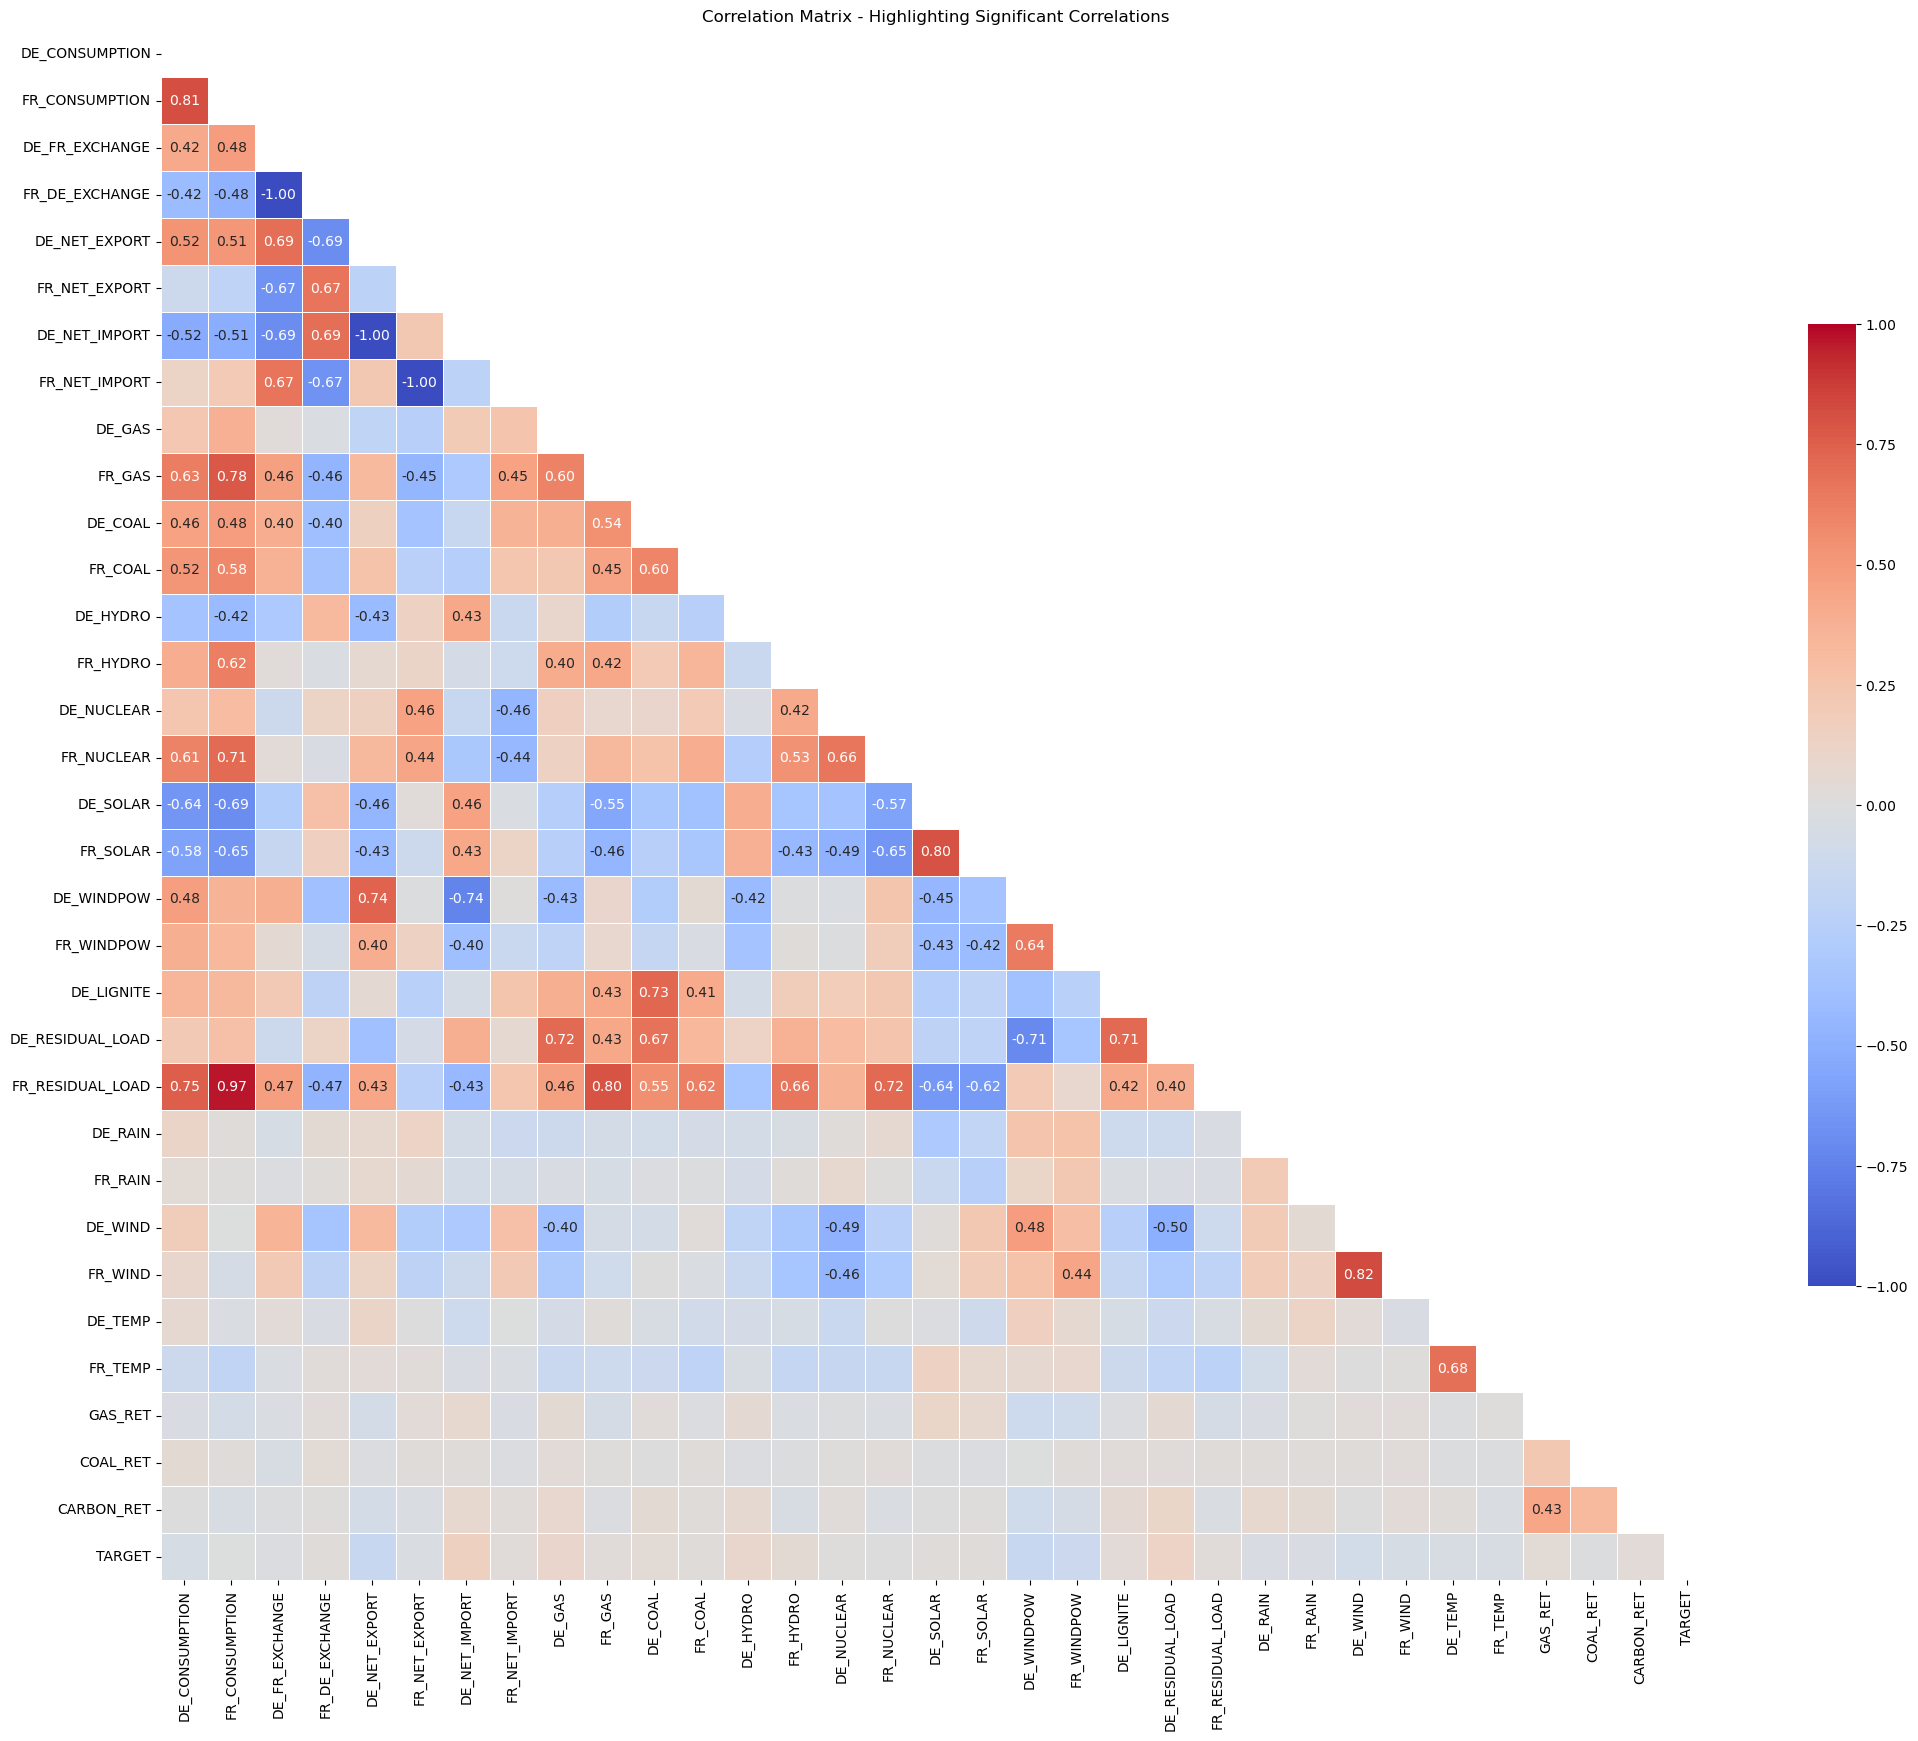

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = combined_train[features].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(25, 25))

threshold = 0.4
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask,
            vmin=-1, vmax=1, center=0,
            fmt=".2f", # Formatting the annotation to 2 decimal places
            cbar_kws={"shrink": .5},
            square=True, linewidths=.5,
            annot_kws={"size": 10})

for text in plt.gca().texts:
    if float(text.get_text()) < threshold and float(text.get_text()) > -threshold:
        text.set_text("")
    else:
        text.set_text(text.get_text())

plt.title('Correlation Matrix - Highlighting Significant Correlations')
plt.show()

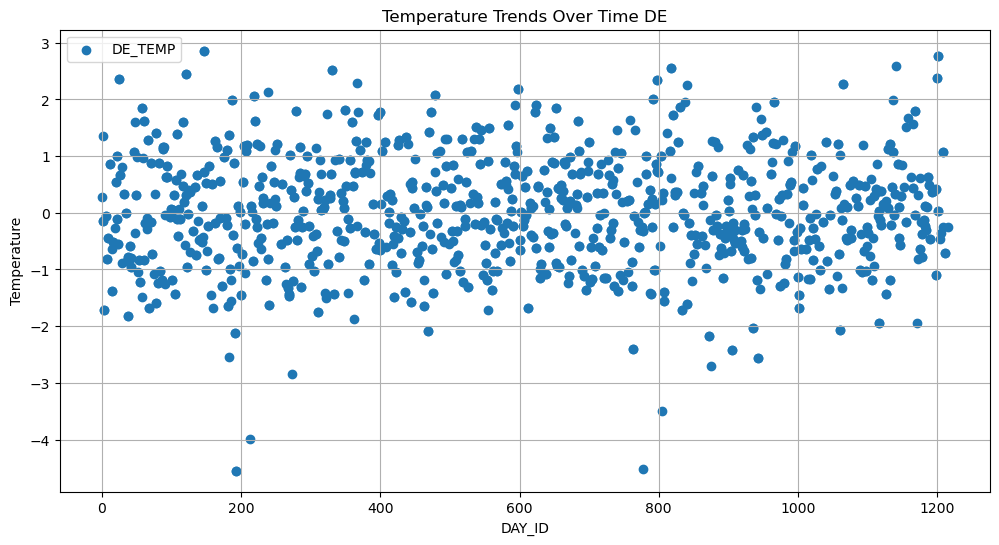

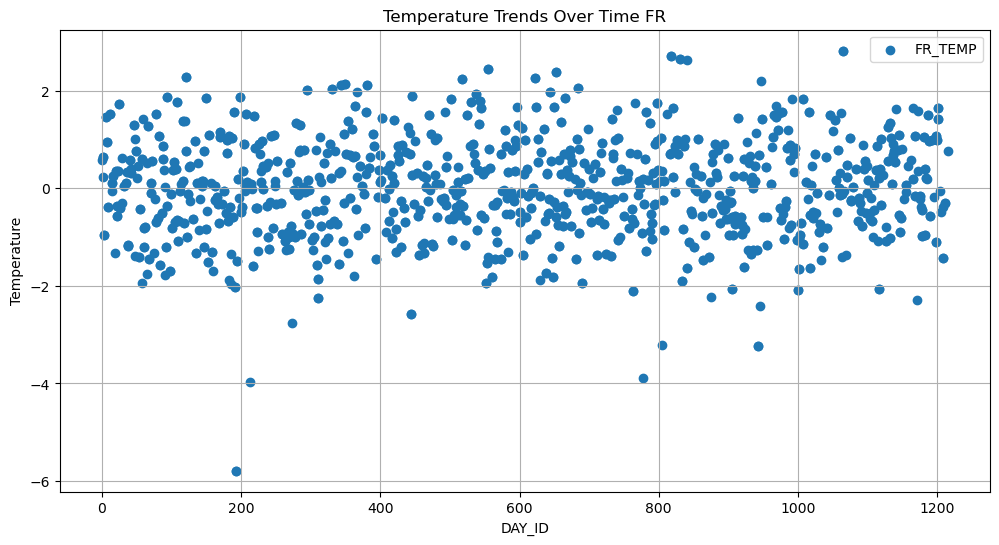

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(X_train['DAY_ID'], X_train['DE_TEMP'], label='DE_TEMP')
plt.xlabel('DAY_ID')
plt.ylabel('Temperature')
plt.title('Temperature Trends Over Time DE')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(X_train['DAY_ID'], X_train['FR_TEMP'], label='FR_TEMP')
plt.xlabel('DAY_ID')
plt.ylabel('Temperature')
plt.title('Temperature Trends Over Time FR')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
X_test.sort_values(by="DAY_ID").head(10)

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
446  1626       4      FR        0.944117        0.203547        0.372743   
231   410       4      DE        0.944117        0.203547        0.372743   
120  1778       6      FR        0.120788       -0.744840       -1.195940   
570   562       6      DE        0.120788       -0.744840       -1.195940   
491  1966       9      FR        1.056973        0.535641        0.989874   
199   750       9      DE        1.056973        0.535641        0.989874   
17   1125      10      FR        0.306463        0.801805        0.344529   
202   802      13      DE       -0.138870       -0.702079       -0.521880   
521  2018      13      FR       -0.138870       -0.702079       -0.521880   
512  1087      17      FR        0.209703       -0.814539        0.439779   

     FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  \
446       -0.372743       0.656335       0.519380      -0.656335   
231       -0.372743       0.656335       0.519380      -0.656335   
120        1.195940      -1.670709       1.164429       1.670709   
570        1.195940      -1.670709       1.164429       1.670709   
491       -0.989874       0.091679      -1.072153      -0.091679   
199       -0.989874       0.091679      -1.072153      -0.091679   
17        -0.344529       0.902401      -0.367998      -0.902401   
202        0.521880      -1.067974      -0.670168       1.067974   
521        0.521880      -1.067974      -0.670168       1.067974   
512       -0.439779            NaN      -0.045395            NaN   

     FR_NET_IMPORT    DE_GAS    FR_GAS   DE_COAL   FR_COAL  DE_HYDRO  \
446      -0.519380  0.451085  0.865857 -0.752504 -0.782998 -0.291237   
231      -0.519380  0.451085  0.865857 -0.752504 -0.782998 -0.291237   
120      -1.164429  1.524895 -0.395402 -0.079164 -0.794950  2.327561   
570      -1.164429  1.524895 -0.395402 -0.079164 -0.794950  2.327561   
491       1.072153  1.107820  1.438079  0.591335 -0.184626  0.831472   
199       1.072153  1.107820  1.438079  0.591335 -0.184626  0.831472   
17        0.367998  0.263876  0.831329 -0.010012  0.548601  0.043723   
202       0.670168  1.326792  0.128697 -0.601360 -0.676503  1.328339   
521       0.670168  1.326792  0.128697 -0.601360 -0.676503  1.328339   
512       0.045395 -0.617943 -0.396121  0.349703 -0.439568  0.066877   

     FR_HYDRO  DE_NUCLEAR  FR_NUCLEAR  DE_SOLAR  FR_SOLAR  DE_WINDPOW  \
446 -0.170210   -0.624823    0.210166 -0.576865  0.028246    1.236785   
231 -0.170210   -0.624823    0.210166 -0.576865  0.028246    1.236785   
120  0.074597   -0.555858   -0.355223  0.609363  1.067572   -1.216568   
570  0.074597   -0.555858   -0.355223  0.609363  1.067572   -1.216568   
491 -0.346792   -1.858791   -0.848931 -0.740908 -0.207280    0.636954   
199 -0.346792   -1.858791   -0.848931 -0.740908 -0.207280    0.636954   
17   0.107452   -0.093096    0.427829 -0.491022 -1.087604    0.689079   
202 -0.844035   -1.984436   -1.582945  1.651811  3.077516   -0.675338   
521 -0.844035   -1.984436   -1.582945  1.651811  3.077516   -0.675338   
512 -0.275371    0.605454   -0.918045 -0.102897  0.485224    0.164170   

     FR_WINDPOW  DE_LIGNITE  DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD   DE_RAIN  \
446    1.139577    0.234593         -0.204223         -0.052684 -0.900802   
231    1.139577    0.234593         -0.204223         -0.052684 -0.900802   
120   -0.564157    0.020925          0.982425         -0.682853  3.127472   
570   -0.564157    0.020925          0.982425         -0.682853  3.127472   
491    0.720334   -0.054368          0.153083          0.301031  0.050956   
199    0.720334   -0.054368          0.153083          0.301031  0.050956   
17     0.408762    0.593084         -0.228253          0.781131  0.228760   
202   -0.521401    0.498361         -0.226993         -0.782514  0.410745   
521   -0.521401    0.498361         -0.226993         -0.782514  0.410745   
512    0.118524    0.525680          0.0444

Text(0.5, 1.0, 'Correlation Matrix')

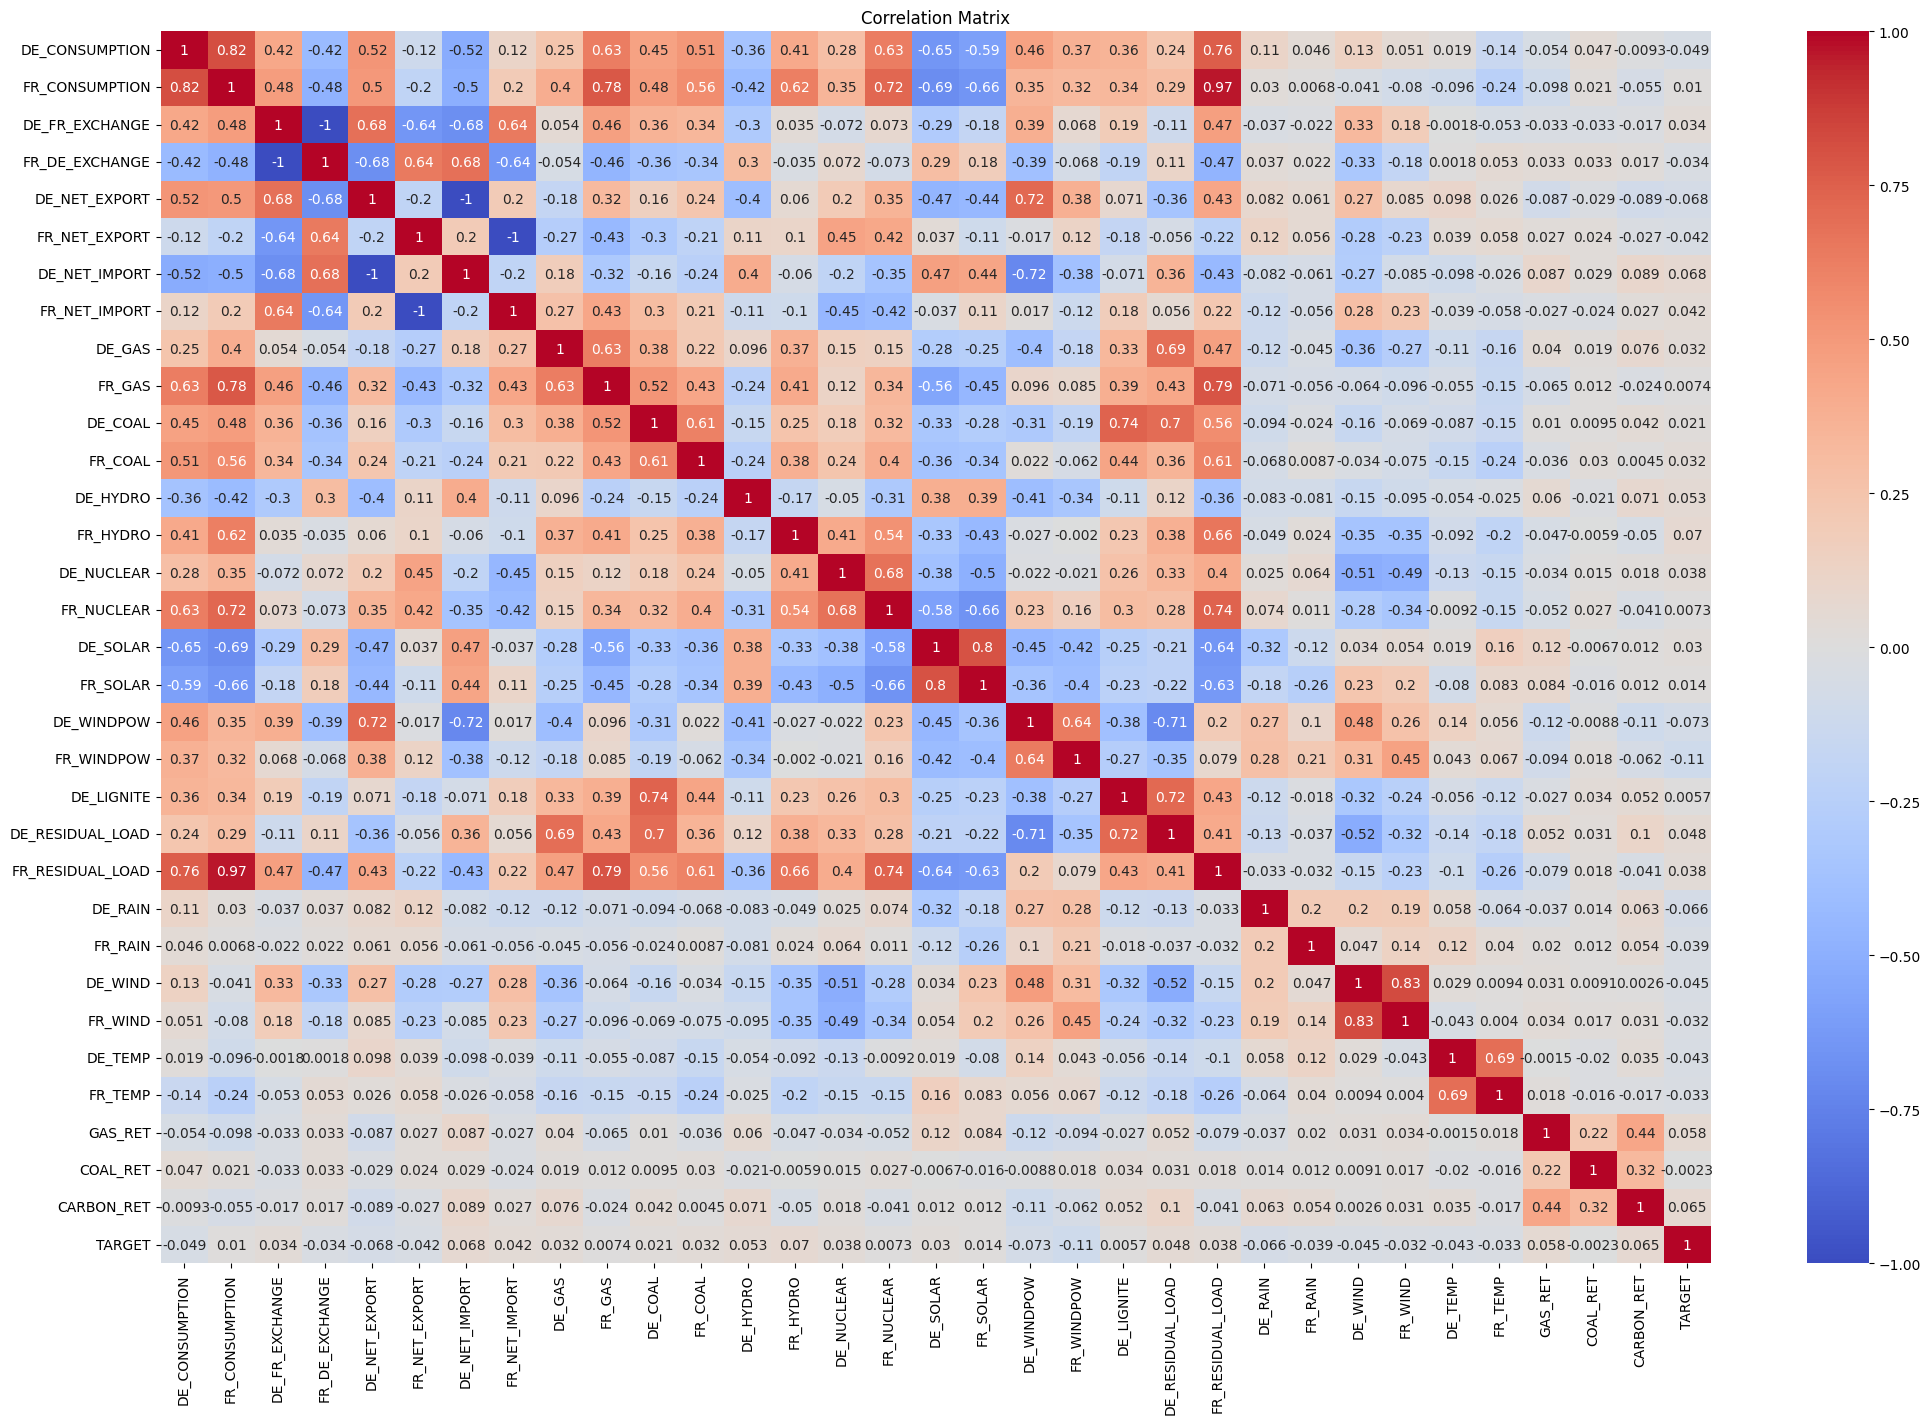

In [24]:
corr = combined_train[combined_train["COUNTRY"]=="FR"][features].corr()

plt.figure(figsize=(25, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

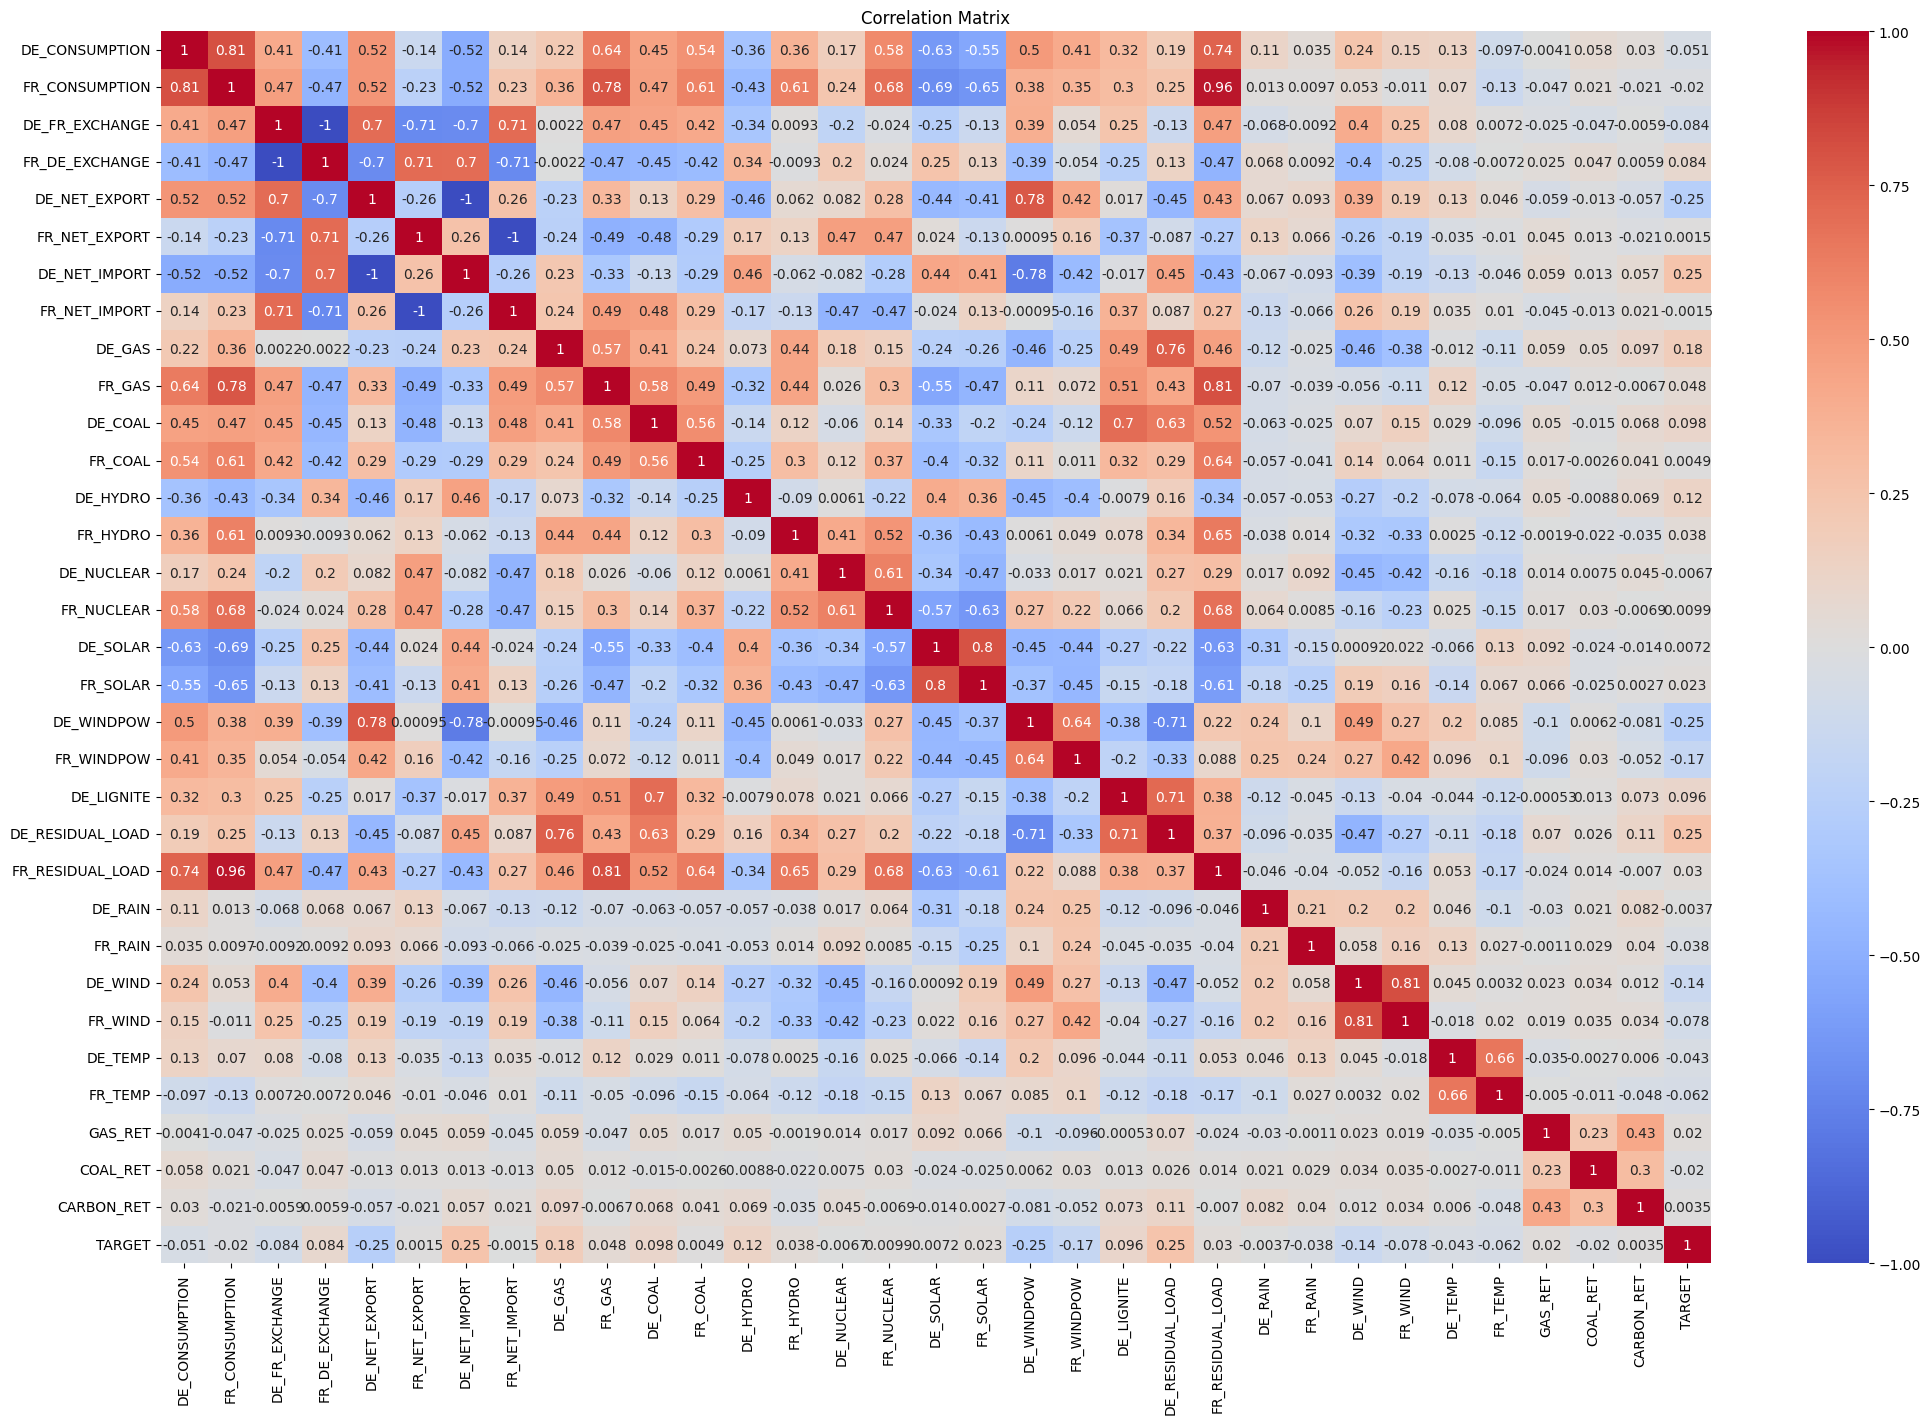

In [25]:
corr = combined_train[combined_train["COUNTRY"]=="DE"][features].corr()

plt.figure(figsize=(25, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

                ID       TARGET
count  1494.000000  1494.000000
mean   1072.759036     0.089934
std     618.013179     1.034582
min       0.000000    -6.519268
25%     540.250000    -0.219861
50%    1077.500000     0.000000
75%    1597.500000     0.269719
max    2146.000000     7.786578


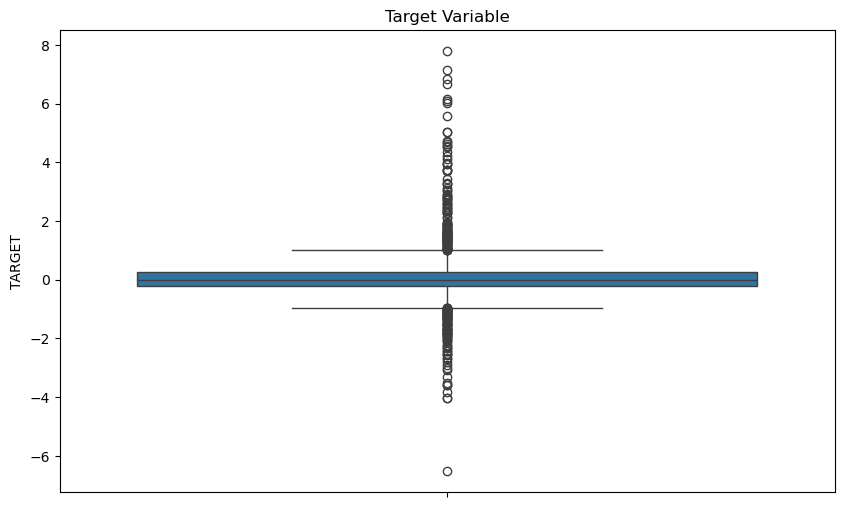

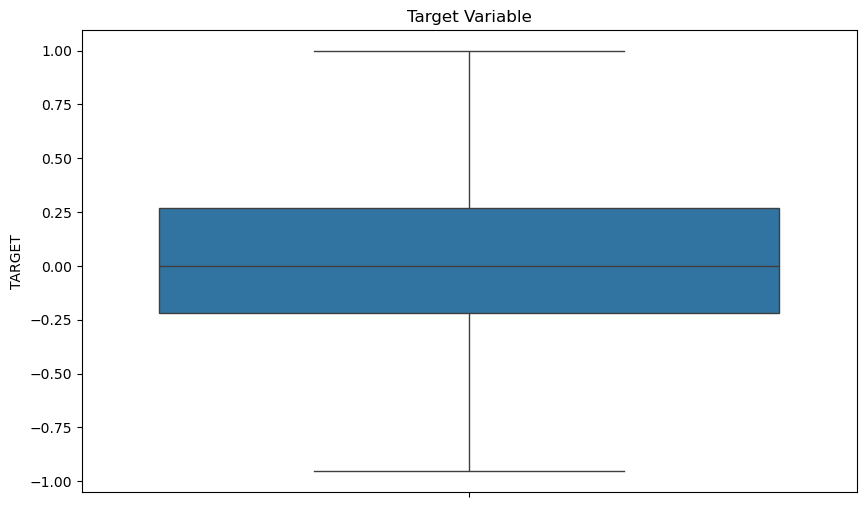

Outliers lower than IQR*1.5 (-0.954): 96 6.43%
Outliers higher than IQR*1.5 (1.004): 133 8.90%


In [27]:
print(Y_train.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=Y_train['TARGET'])
plt.title('Target Variable')
plt.show()

# show 10% and 90% quantiles in boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Y_train['TARGET'], showfliers=False)
plt.title('Target Variable')
plt.show()

Q1 = Y_train['TARGET'].quantile(0.25)
Q3 = Y_train['TARGET'].quantile(0.75)
IQR = Q3 - Q1
outliers_lower = Y_train[Y_train['TARGET'] < (Q1 - 1.5 * IQR)]
outliers_higher = Y_train[Y_train['TARGET'] > (Q3 + 1.5 * IQR)]
print(f'Outliers lower than IQR*1.5 ({Q1 - 1.5 * IQR:.3f}): {outliers_lower.shape[0]} {outliers_lower.shape[0] / Y_train.shape[0]*100:.2f}%')
print(f'Outliers higher than IQR*1.5 ({Q3 + 1.5 * IQR:.3f}): {outliers_higher.shape[0]} {outliers_higher.shape[0] / Y_train.shape[0]*100:.2f}%')

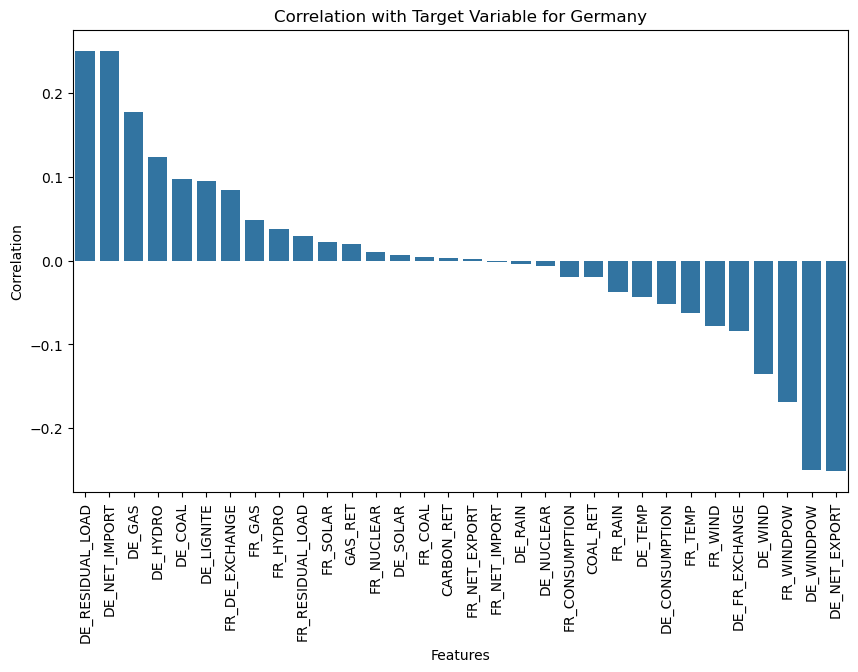

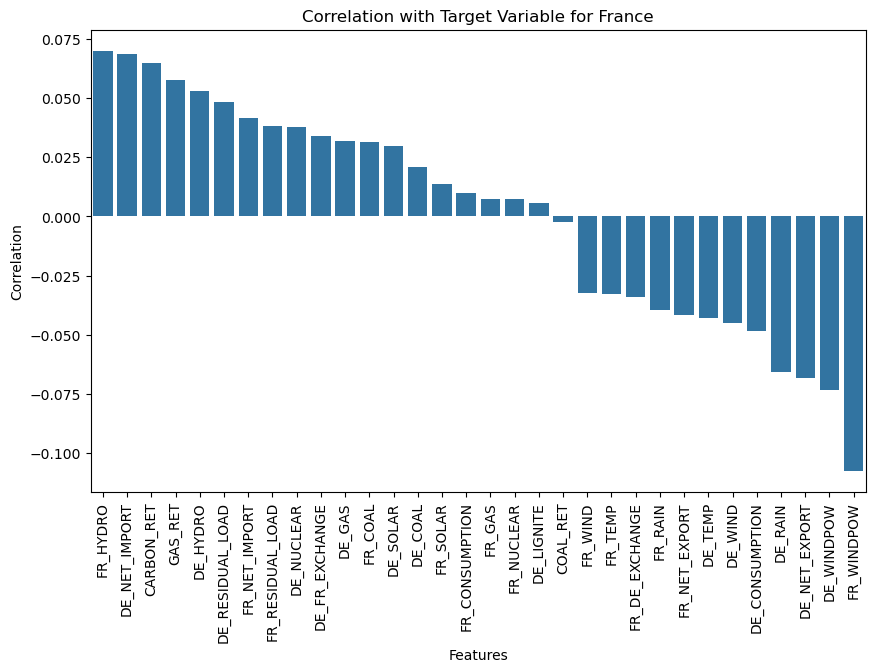

In [28]:
DE_combined_train = combined_train[combined_train['COUNTRY'] == 'DE']
FR_combined_train = combined_train[combined_train['COUNTRY'] == 'FR']

# correlation between features and target variable
corr_DE = DE_combined_train[features.drop('TARGET')].corrwith(DE_combined_train['TARGET'])
corr_FR = FR_combined_train[features.drop('TARGET')].corrwith(FR_combined_train['TARGET'])

corr_DE = corr_DE.sort_values(ascending=False)
corr_FR = corr_FR.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_DE.index, y=corr_DE)
plt.title('Correlation with Target Variable for Germany')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_FR.index, y=corr_FR)
plt.title('Correlation with Target Variable for France')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

## Model and train score

The benchark for this challenge consists in a simple linear regression, after a light cleaning of the data: The missing (NaN) values are simply filled with 0's and the `COUNTRY` column is dropped - namely we used the same model for France and Germany.

In [29]:
lr = LinearRegression()

X_train_clean = X_train.drop(['COUNTRY'], axis=1).fillna(0)
Y_train_clean = Y_train['TARGET']

lr.fit(X_train_clean, Y_train_clean)

output_train = lr.predict(X_train_clean)

def metric_train(output):

    return spearmanr(output, Y_train_clean).correlation

print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(output_train) ))

Spearman correlation for the train set: 27.9%


The Spearman correlation obtained with our model on the train data set is about 27.9%.

NB: Electricity price variations can be quite volatile and this is why we have chosen the Spearman rank correlation as a robust metric for the challenge, instead of the more standard Pearson correlation.

## Generate the benchmark output

Next, we process the test set the same way as we did on the train set and predict using our linear model, while saving the predictions to a csv file satisfying the challenge output contraints.


In [29]:
X_test.sort_values(by='DAY_ID').head(10)

ID  DAY_ID COUNTRY  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
446  1626       4      FR        0.944117        0.203547        0.372743   
231   410       4      DE        0.944117        0.203547        0.372743   
120  1778       6      FR        0.120788       -0.744840       -1.195940   
570   562       6      DE        0.120788       -0.744840       -1.195940   
491  1966       9      FR        1.056973        0.535641        0.989874   
199   750       9      DE        1.056973        0.535641        0.989874   
17   1125      10      FR        0.306463        0.801805        0.344529   
202   802      13      DE       -0.138870       -0.702079       -0.521880   
521  2018      13      FR       -0.138870       -0.702079       -0.521880   
512  1087      17      FR        0.209703       -0.814539        0.439779   

     FR_DE_EXCHANGE  DE_NET_EXPORT  FR_NET_EXPORT  DE_NET_IMPORT  \
446       -0.372743       0.656335       0.519380      -0.656335   
231       -0.372743       0.656335       0.519380      -0.656335   
120        1.195940      -1.670709       1.164429       1.670709   
570        1.195940      -1.670709       1.164429       1.670709   
491       -0.989874       0.091679      -1.072153      -0.091679   
199       -0.989874       0.091679      -1.072153      -0.091679   
17        -0.344529       0.902401      -0.367998      -0.902401   
202        0.521880      -1.067974      -0.670168       1.067974   
521        0.521880      -1.067974      -0.670168       1.067974   
512       -0.439779            NaN      -0.045395            NaN   

     FR_NET_IMPORT    DE_GAS    FR_GAS   DE_COAL   FR_COAL  DE_HYDRO  \
446      -0.519380  0.451085  0.865857 -0.752504 -0.782998 -0.291237   
231      -0.519380  0.451085  0.865857 -0.752504 -0.782998 -0.291237   
120      -1.164429  1.524895 -0.395402 -0.079164 -0.794950  2.327561   
570      -1.164429  1.524895 -0.395402 -0.079164 -0.794950  2.327561   
491       1.072153  1.107820  1.438079  0.591335 -0.184626  0.831472   
199       1.072153  1.107820  1.438079  0.591335 -0.184626  0.831472   
17        0.367998  0.263876  0.831329 -0.010012  0.548601  0.043723   
202       0.670168  1.326792  0.128697 -0.601360 -0.676503  1.328339   
521       0.670168  1.326792  0.128697 -0.601360 -0.676503  1.328339   
512       0.045395 -0.617943 -0.396121  0.349703 -0.439568  0.066877   

     FR_HYDRO  DE_NUCLEAR  FR_NUCLEAR  DE_SOLAR  FR_SOLAR  DE_WINDPOW  \
446 -0.170210   -0.624823    0.210166 -0.576865  0.028246    1.236785   
231 -0.170210   -0.624823    0.210166 -0.576865  0.028246    1.236785   
120  0.074597   -0.555858   -0.355223  0.609363  1.067572   -1.216568   
570  0.074597   -0.555858   -0.355223  0.609363  1.067572   -1.216568   
491 -0.346792   -1.858791   -0.848931 -0.740908 -0.207280    0.636954   
199 -0.346792   -1.858791   -0.848931 -0.740908 -0.207280    0.636954   
17   0.107452   -0.093096    0.427829 -0.491022 -1.087604    0.689079   
202 -0.844035   -1.984436   -1.582945  1.651811  3.077516   -0.675338   
521 -0.844035   -1.984436   -1.582945  1.651811  3.077516   -0.675338   
512 -0.275371    0.605454   -0.918045 -0.102897  0.485224    0.164170   

     FR_WINDPOW  DE_LIGNITE  DE_RESIDUAL_LOAD  FR_RESIDUAL_LOAD   DE_RAIN  \
446    1.139577    0.234593         -0.204223         -0.052684 -0.900802   
231    1.139577    0.234593         -0.204223         -0.052684 -0.900802   
120   -0.564157    0.020925          0.982425         -0.682853  3.127472   
570   -0.564157    0.020925          0.982425         -0.682853  3.127472   
491    0.720334   -0.054368          0.153083          0.301031  0.050956   
199    0.720334   -0.054368          0.153083          0.301031  0.050956   
17     0.408762    0.593084         -0.228253          0.781131  0.228760   
202   -0.521401    0.498361         -0.226993         -0.782514  0.410745   
521   -0.521401    0.498361         -0.226993         -0.782514  0.410745   
512    0.118524    0.525680          0.0444

In [30]:
X_test_clean = X_test.drop(['COUNTRY'], axis=1).fillna(0)

Y_test_submission = X_test[['ID']].copy()
Y_test_submission['TARGET'] = lr.predict(X_test_clean)

# Y_test_submission.to_csv('benchmark_qrt.csv', index=False)


In [31]:
from sklearn.metrics import r2_score

accuracy_training = r2_score(Y_train_clean, output_train)
accuracy_training

0.05916282037143605

After submitting this benchmark_qrt.csv file at https://challengedata.ens.fr, we obtain a public score of around 15.9 % - this is the score to beat!


## Tips and ideas for improvements

- Thinking about the fundamental price drivers of electricity in each country may be useful.

- The dataset is small, so you will need to be careful not to overfit your models. It will be useful to use good crossvalidation practices.


# Feature Engineering

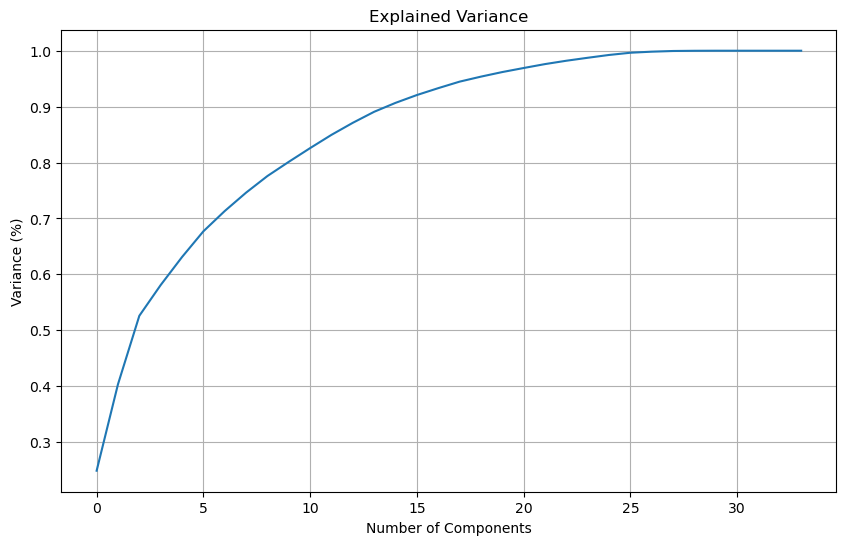

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)

pca = PCA()
pca.fit(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [70]:
pca_scaled_train = PCA(n_components=0.95)
X_train_pca = pca_scaled_train.fit_transform(X_train_scaled)
X_test_pca = pca_scaled_train.transform(scaler.transform(X_test_cp.drop('COUNTRY', axis=1)))

print(f'Number of components to explain 95% of the variance: {pca_scaled_train.n_components_}')

Number of components to explain 95% of the variance: 19


In [71]:
pd.DataFrame(X_train_pca).to_csv(root_path+'X_train_pca.csv', index=False)
pd.DataFrame(X_test_pca).to_csv(root_path+'X_test_pca.csv', index=False)

## Correlation plot between the features and Target

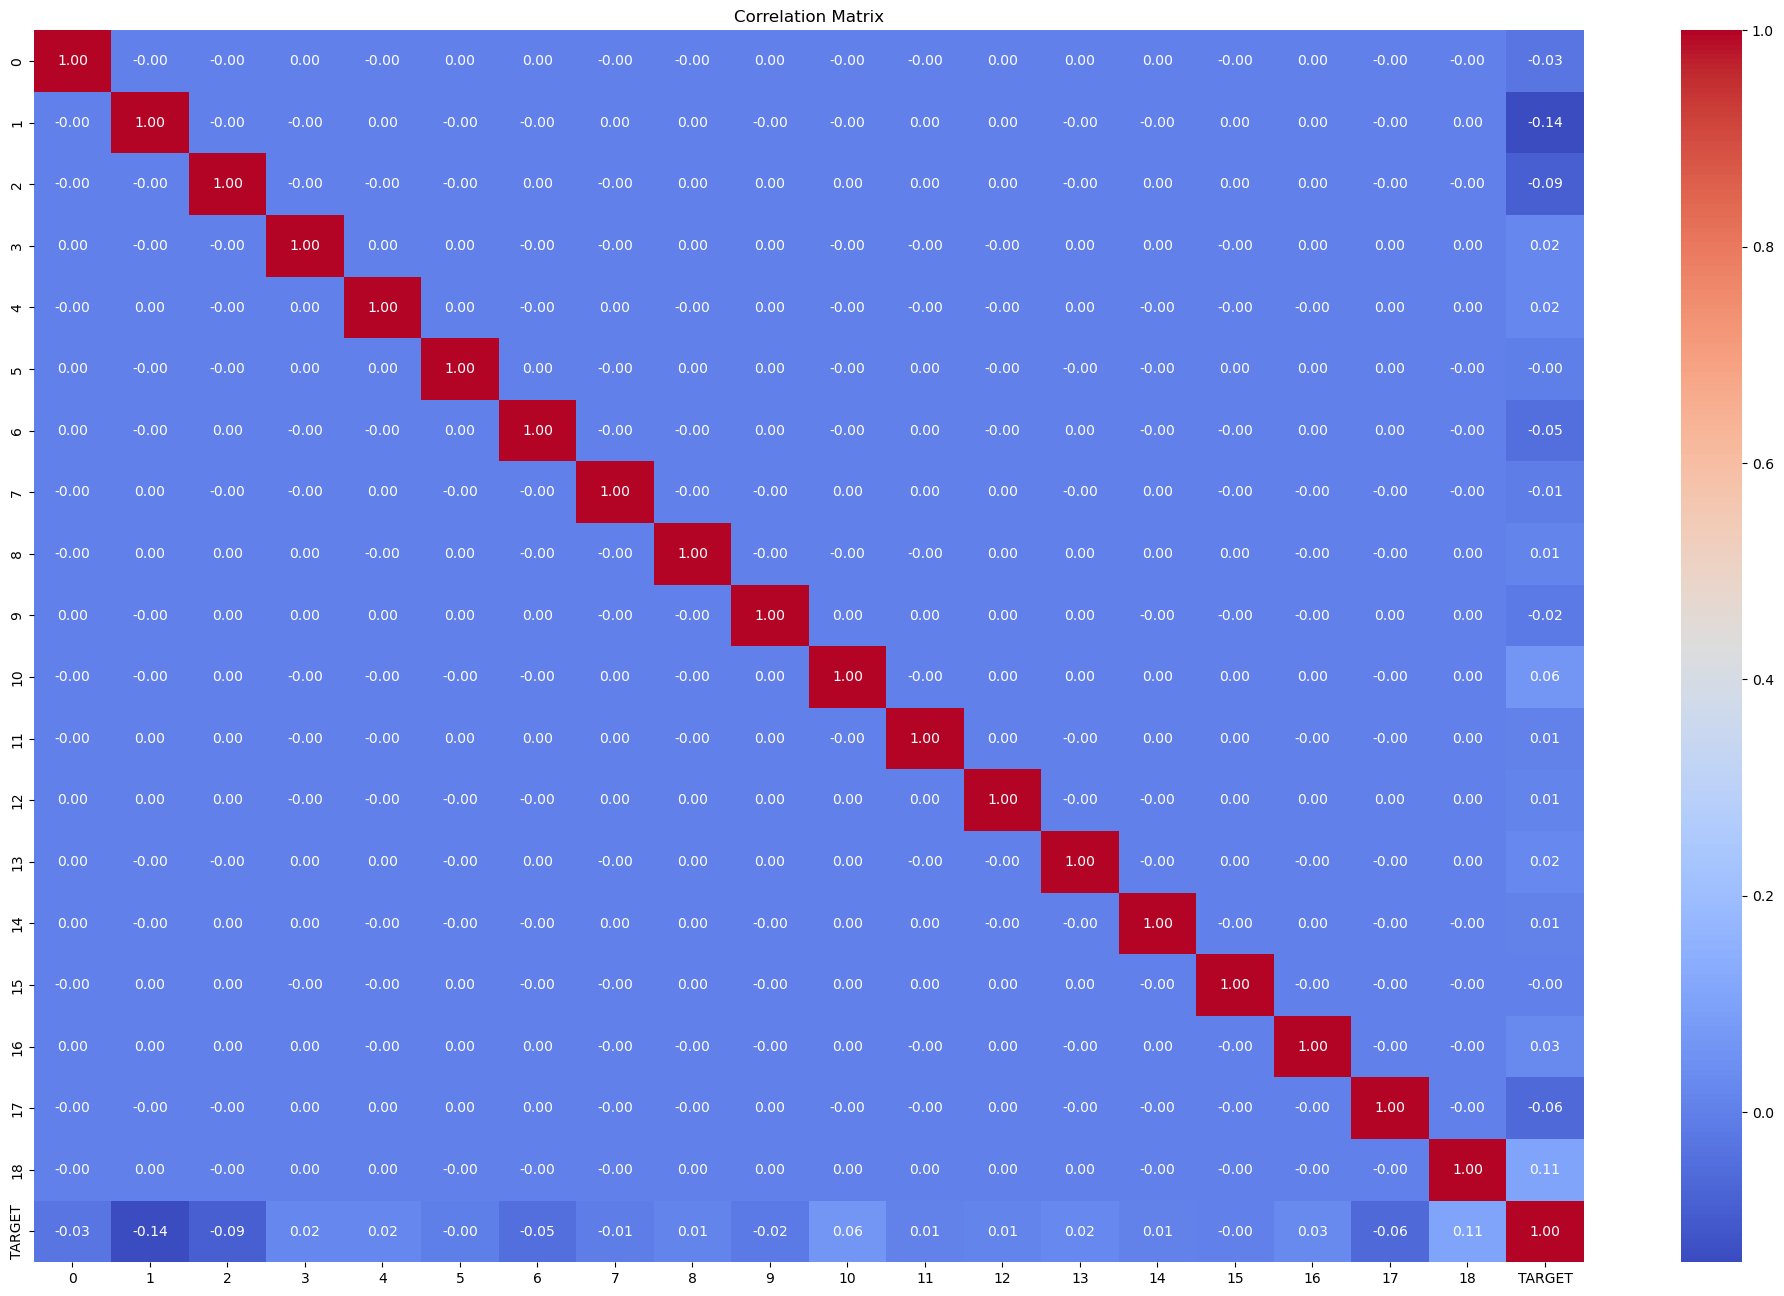

In [45]:
pca_train_combined = pd.merge(pd.DataFrame(X_train_pca), Y_train, left_index=True, right_index=True)
pca_train_combined = pca_train_combined.drop(columns=['ID']).reset_index(drop=True)
corr = pca_train_combined.corr()

plt.figure(figsize=(25, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [46]:
combined_train_FR = combined_train[combined_train['COUNTRY'] == 'FR']
combined_train_DE = combined_train[combined_train['COUNTRY'] == 'DE']
combined_train_FR_sorted = combined_train_FR.sort_values(by='DAY_ID')
combined_train_DE_sorted = combined_train_DE.sort_values(by='DAY_ID')

combined_train_FR_sorted.reset_index(drop=True, inplace=True)
combined_train_DE_sorted.reset_index(drop=True, inplace=True)

all_columns = ['DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET', 'TARGET']
features_FR = ['DAY_ID', 'FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS', 'FR_COAL', 'FR_HYDRO', 'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'FR_RAIN', 'FR_WIND', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET']
features_DE = ['DAY_ID', 'DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL', 'DE_HYDRO', 'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'DE_RAIN', 'DE_WIND', 'DE_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET']


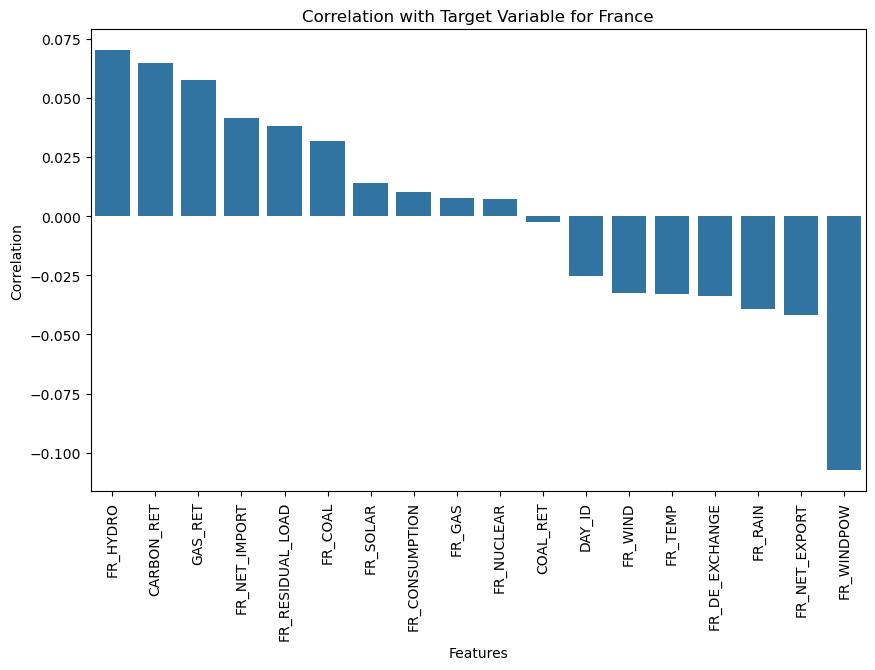

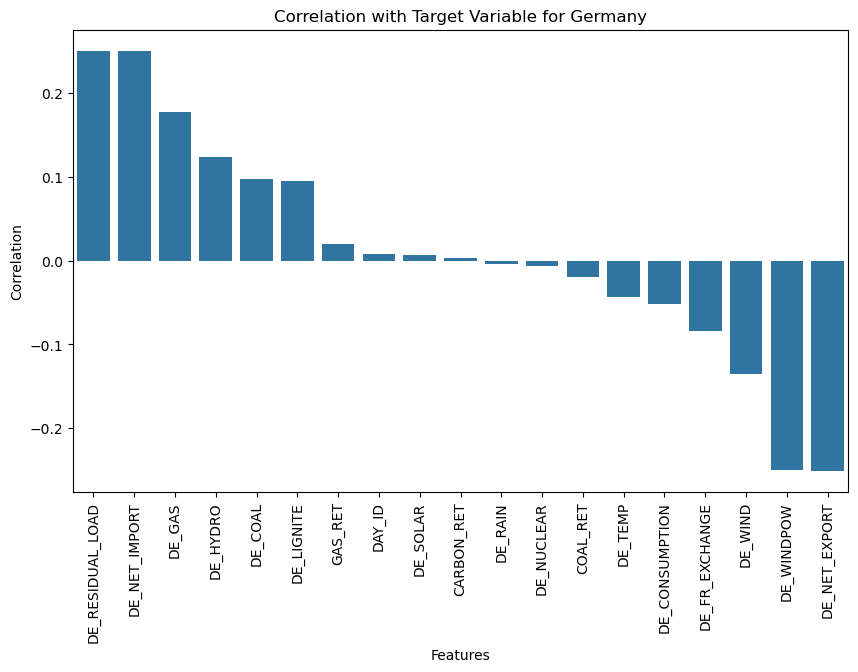

In [47]:
corr_FR_with_target = combined_train_FR_sorted[features_FR].corrwith(combined_train_FR_sorted['TARGET'])
corr_FR_with_target = corr_FR_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_FR_with_target.index, y=corr_FR_with_target)
plt.title('Correlation with Target Variable for France')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

corr_DE_with_target = combined_train_DE_sorted[features_DE].corrwith(combined_train_DE_sorted['TARGET'])
corr_DE_with_target = corr_DE_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_DE_with_target.index, y=corr_DE_with_target)
plt.title('Correlation with Target Variable for Germany')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

In [48]:
combined_train_sorted_FR = combined_train[combined_train['COUNTRY'] == 'FR'].sort_values('DAY_ID')
combined_train_sorted_DE = combined_train[combined_train['COUNTRY'] == 'DE'].sort_values('DAY_ID')

# To understand the target variable we plot it against time

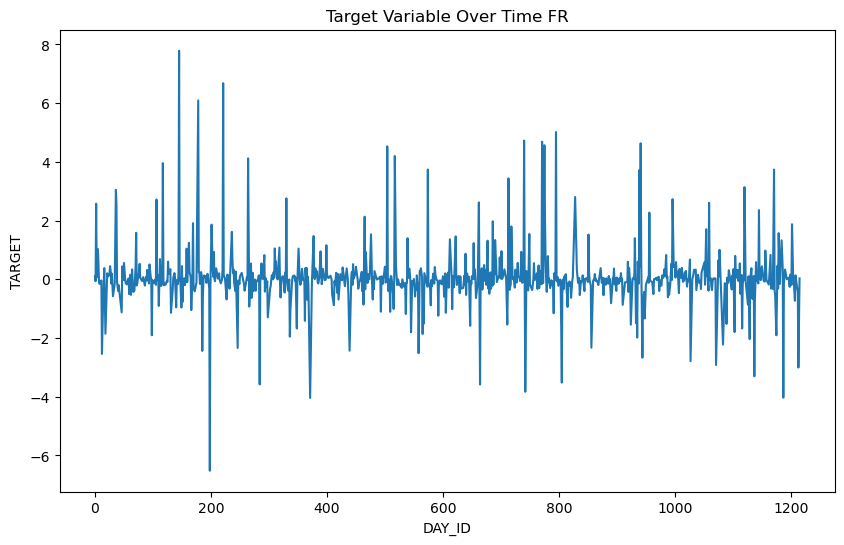

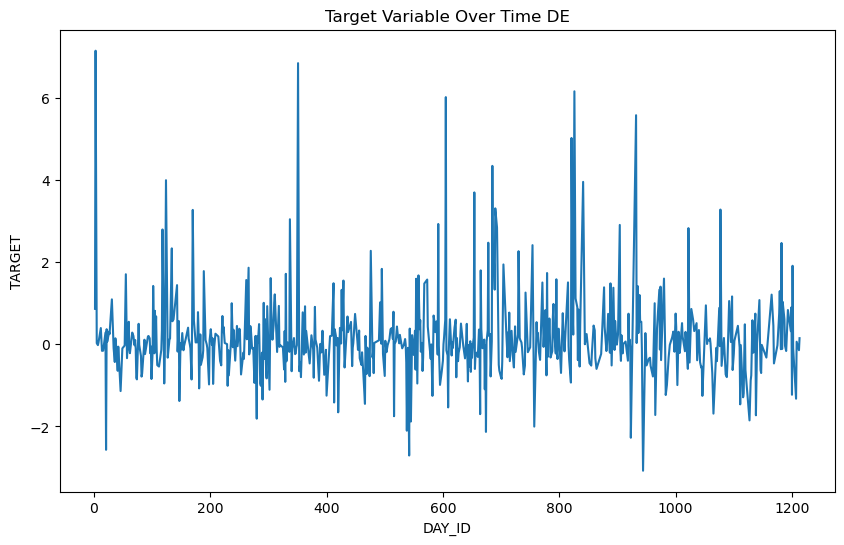

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_train_sorted_FR, x='DAY_ID', y='TARGET')
plt.title('Target Variable Over Time FR')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_train_sorted_DE, x='DAY_ID', y='TARGET')
plt.title('Target Variable Over Time DE')
plt.show()

## Time Series Analysis

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

day_sorted_FR_data = combined_train_sorted_FR.sort_values('DAY_ID').reset_index(drop=True)['TARGET']
day_sorted_DE_data = combined_train_sorted_DE.sort_values('DAY_ID').reset_index(drop=True)['TARGET']

In [51]:
result = adfuller(day_sorted_FR_data)

print('ADF Statistic for FR:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

result = adfuller(day_sorted_DE_data)

print('ADF Statistic for DE:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic for FR: -27.978553021834408
p-value: 0.0
Critical Values:
	1%: -3.438066656679015
	5%: -2.8649462783472424
	10%: -2.5685837702422147
ADF Statistic for DE: -17.425888841844916
p-value: 4.797060325315305e-30
Critical Values:
	1%: -3.4405928713433735
	5%: -2.866059505075432
	10%: -2.5691768365293113


<Figure size 3000x600 with 0 Axes>

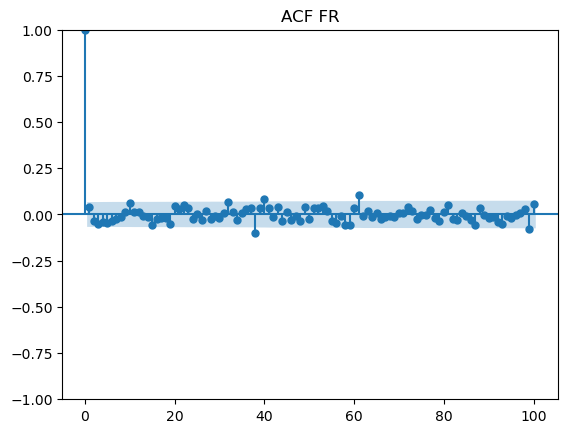

<Figure size 3000x600 with 0 Axes>

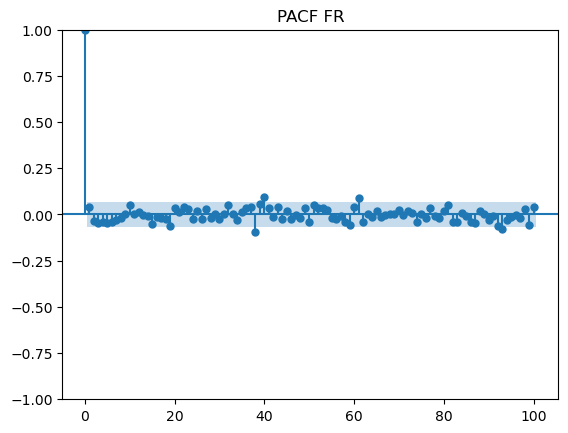

<Figure size 3000x600 with 0 Axes>

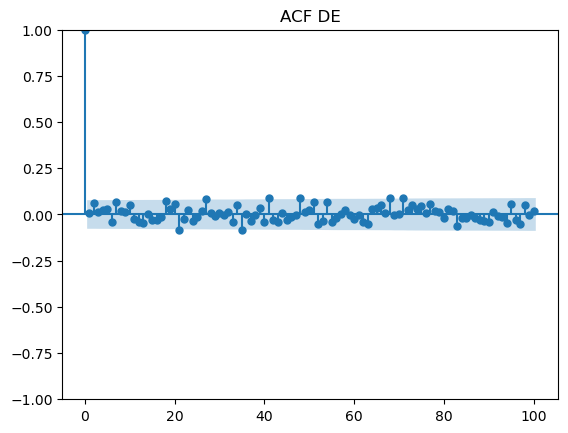

<Figure size 3000x600 with 0 Axes>

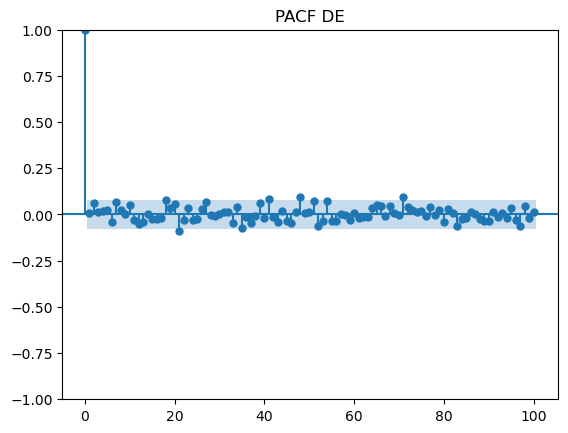

In [52]:
plt.figure(figsize=(30, 6))
plot_acf(day_sorted_FR_data, lags=100, title='ACF FR')
plt.show()

plt.figure(figsize=(30, 6))
plot_pacf(day_sorted_FR_data, lags=100, title='PACF FR')
plt.show()

plt.figure(figsize=(30, 6))
plot_acf(day_sorted_DE_data, lags=100, title='ACF DE')
plt.show()

plt.figure(figsize=(30, 6))
plot_pacf(day_sorted_DE_data, lags=100, title='PACF DE')
plt.show()